In [2]:
%load_ext autoreload
%autoreload 2

import os,sys,warnings
import h5py, pandas
import numpy as np
np.seterr(invalid=['ignore','warn'][0])
np.set_printoptions(legacy='1.25')
import math,cmath,pickle
from matplotlib.backends.backend_pdf import PdfPages
from scipy.optimize import curve_fit,fsolve
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('default')
mpl.rcParams['figure.facecolor'] = 'white'
mpl.rcParams['figure.titlesize'] = 20
mpl.rcParams['figure.figsize'] = [6.4*1.2,4.8*1.2]
mpl.rcParams['axes.labelsize'] = 24
mpl.rcParams['axes.titlesize'] = 24
mpl.rcParams['lines.marker'] = 's'
mpl.rcParams['lines.linestyle'] = ''
mpl.rcParams['lines.markersize'] = 6
mpl.rcParams['errorbar.capsize'] = 6
mpl.rcParams['xtick.labelsize'] = mpl.rcParams['ytick.labelsize'] = 22
mpl.rcParams['xtick.major.size'] = mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['xtick.top']=mpl.rcParams['ytick.right']=True
mpl.rcParams['xtick.direction']=mpl.rcParams['ytick.direction']='in'
mpl.rcParams['legend.fontsize'] = 24
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"

# mpl.rcParams.update({"axes.grid" : True})
import util as yu
yu.flag_fast=False

enss=['b','c','d','e']
enss=['b','c','d']
ens2full={'a24':'cA211.53.24','a':'cA2.09.48','b':'cB211.072.64','c':'cC211.060.80','d':'cD211.054.96','e':'cE211.044.112'}
ens2label={'a24':'A24','a':'A48','b':'B64','c':'C80','d':'D96','e':'E112'}
ens2a={'a24':0.0908,'a':0.0938,'b':0.07957,'c':0.06821,'d':0.05692,'e':0.04892} # fm
ens2N={'a24':24,'a':48,'b':64,'c':80,'d':96,'e':112}
ens2N_T={'a24':24*2,'a':48*2,'b':64*2,'c':80*2,'d':96*2,'e':112*2}

ens2Z_1d_V={'b':1.1262,'c':1.1573,'d':1.1930,'e':1.2175}

# ens2mN={'a':931}
# ens2mpiC={'a':131}
# ens2mpi0={'a':111}

ens2amu={'a24':0.0053,'a':0.0009,'b':0.00072}
ens2amus={'b':0.0186}
ens2amuc={'b':0.249}
ens2ZP={'a24':(0.4670,0.0046),'a':(0.500,0.030)}

hbarc = 1/197.3
ens2aInv={ens:1/(ens2a[ens]*hbarc) for ens in enss} # MeV

ens2tfs={'b':range(2,22+1),'c':range(2,26+1),'d':range(2,30+1),'e':range(2,32+1)}

def fsolve2(func,x0):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        res=fsolve(func, x0)[0]
    return res if res!=x0 else np.NaN

# ens='b'
# ens2a[ens]*hbarc*1000

def find_t_cloest(ens,t):
    return round(t/ens2a[ens])

baseFigPath=f'fig/analysis1/'

def moms2dic(moms):
    dic={}
    for i,mom in enumerate(moms):
        dic[tuple(mom)]=i
    return dic

ens2moms_all={}
for ens in enss:
    path=f'/p/project1/ngff/li47/code/scratch/run/02_discNJN_1D_run2/{ens2full[ens]}/data_merge/data.h5'
    with h5py.File(path) as f:
        t=f['discNJN_j+;g{m,Dn};tl.h5']['notes'][:]
        projs=t[-1].decode().split('=')[-1][1:-1].split(',')
        t=f['j.h5/inserts'][:]
        inserts=[ele.decode() for ele in t]
        
        ens2moms_all[ens]=f['discNJN_j+;g{m,Dn};tl.h5']['moms'][:]
        print(ens2moms_all[ens].shape)
print(projs)
print(inserts)

moms_all=[]
for ens in enss:
    moms_all+=[tuple(mom) for mom in ens2moms_all[ens]]
moms_all=[tuple(mom) for mom in set(moms_all)]
moms_all.sort()
moms_all=np.array(moms_all)

moms_common=[]
for mom in moms_all:
    flag=True
    for ens in enss:
        if tuple(mom) not in [tuple(mom) for mom in ens2moms_all[ens]]:
            flag=False
    if flag:
        moms_common.append(list(mom))
moms_common.sort()
moms_common=np.array(moms_common)


# stouts=range(0,40+1)
stouts=[4,7,10,13,16,19,22]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
(15, 6)
(16, 6)
(16, 6)
['P0', 'Px', 'Py', 'Pz']
['tt', 'tx', 'ty', 'tz', 'xx', 'xy', 'xz', 'yy', 'yz', 'zz']


In [10]:
for ens in enss:
    path=f'/p/project1/ngff/li47/code/scratch/run/02_discNJN_1D_run2/{ens2full[ens]}/data_merge/data.h5'
    with h5py.File(path) as f:
        moms=f['discNJN_j+;g{m,Dn};tl.h5/moms'][:]
        t=[np.sum(mom**2) for mom in moms]
        t.sort()
        print(t)

[0, 1, 2, 3, 4, 5, 6, 8, 9, 9, 10, 11, 12, 13, 14]
[0, 1, 2, 3, 4, 5, 6, 8, 9, 9, 10, 11, 12, 13, 14, 16]
[0, 1, 2, 3, 4, 5, 6, 8, 9, 9, 10, 11, 12, 13, 14, 16]


In [2]:
# path1='/p/project1/ngff/li47/code/projectData/02_discNJN_1D/cB211.072.64/data_earlytest/test2.h5'
# path2='/p/project1/ngff/li47/code/scratch/run/02_discNJN_1D_run2/cB211.072.64/data_merge/data.h5'

# with h5py.File(path1) as f1, h5py.File(path2) as f2:
#     print(f1['j+'].keys())
#     print(f1['j+/P44(G0,0,0)']['3'][0])
    
#     moms=f2['discNJN_j+;g{m,Dn};tl.h5/moms'][0]
#     print(moms)
#     inserts=f2['discNJN_j+;g{m,Dn};tl.h5/inserts;g{m,Dn};tl'][:]
#     print(inserts)
#     print(f2['discNJN_j+;g{m,Dn};tl.h5/data/N_N_j+;g{m,Dn};tl_3'][0,:,0,0,0])
    
#     print(f1['j+/P44(G0,0,0)_vev'][0])
#     print(f2['j.h5/j+;g{m,Dn};tl_vev'][0,0])
    

In [3]:
data={}
for ens in enss:
    path=f'/p/project1/ngff/li47/code/scratch/run/02_discNJN_1D_run2/{ens2full[ens]}/data_merge/data.h5'
    with h5py.File(path) as f:
        moms=f['N.h5/moms'][:]
        moms=[tuple(mom) for mom in moms]
        ind=moms.index((0,0,0))
        
        data[ens]=yu.jackknife(np.real(f['N.h5/data/N_N'][:,:,ind]))

propThreshold=0.1
# propThreshold=None

chi2Size=9
settings={}

func_C2pt_1st=lambda t,E0,c0: c0*np.exp(-E0*t)
func_C2pt_2st=lambda t,E0,c0,dE1,rc1: c0*np.exp(-E0*t)*(1 + rc1*np.exp(-dE1*t))
func_C2pt_3st=lambda t,E0,c0,dE1,rc1,dE2,rc2: c0*np.exp(-E0*t)*(1 + rc1*np.exp(-dE1*t) + rc2*np.exp(-dE2*t))
func_mEff_1st=lambda t,E0: np.log(func_C2pt_1st(t,E0,1)/func_C2pt_1st(t+1,E0,1))
func_mEff_2st=lambda t,E0,dE1,rc1: np.log(func_C2pt_2st(t,E0,1,dE1,rc1)/func_C2pt_2st(t+1,E0,1,dE1,rc1))
func_mEff_3st=lambda t,E0,dE1,rc1,dE2,rc2: np.log(func_C2pt_3st(t,E0,1,dE1,rc1,dE2,rc2)/func_C2pt_3st(t+1,E0,1,dE1,rc1,dE2,rc2))

def run(ens,figname=None):
    corrQ=True; meffQ=True
    xunit=ens2a[ens]; yunit=ens2aInv[ens]/1000
    fig, axd = plt.subplot_mosaic([['f1','f1','f1'],['f2','f2','f3']],figsize=(24,10))
    (ax1,ax2,ax3)=(axd[key] for key in ['f1','f2','f3'])
    # if meffQ:
    #     fig.suptitle('Correlated fit to meff' if corrQ else 'Uncorrelated fit to meff',fontsize=44)
    # else:
    #     fig.suptitle('Correlated fit to C2pt' if corrQ else 'Uncorrelated fit to C2pt',fontsize=44)
    
    ax1.set_xlabel(r'$t$ [fm]')
    ax2.set_xlabel(r'$t_{\mathrm{min}}$ [fm]')
    ax3.set_xlabel(r'$t_{\mathrm{min}}$ [fm]')
    ax1.set_ylabel(r'$m_N^{\mathrm{eff}}$ [GeV]')
    ax2.set_ylabel(r'$m_N$ [GeV]')
    ax3.set_ylabel(r'$E_1$ [GeV]')
    ax1.set_ylim(settings['ylim1'])
    ax2.set_ylim(settings['ylim2'])
    ax3.set_ylim(settings['ylim3'])
    ax1.set_xlim(settings['xlim1'])
    ax2.set_xlim(settings['xlim2'])
    ax3.set_xlim(settings['xlim3'])
    
    mN_exp=0.938; mp_exp,mn_exp=(0.93827,0.93957)
    ax1.axhline(y=mN_exp,color='black',linestyle = '--', marker='')
    ax2.axhline(y=mN_exp,color='black',linestyle = '--', marker='', label=r'$m_N^{\mathrm{exp}}=$'+'%0.3f'%mN_exp)
    C2pt_jk=data[ens]
    C2pt_mean,C2pt_err=yu.jackme(C2pt_jk)
    C2pt_rela=np.abs(C2pt_err/C2pt_mean)
    func=lambda C2pt: np.log(C2pt/np.roll(C2pt,-1,axis=0))
    mEff_jk=yu.jackmap(func,C2pt_jk)
    (mEff_mean,mEff_err)=yu.jackme(mEff_jk)
    mEff_rela=np.abs(mEff_err/mEff_mean)
    temp=[(i,rela) for i,rela in enumerate(mEff_rela if meffQ else C2pt_rela) if rela>0.2 and i!=0]
    fitmax=temp[0][0]-1 if len(temp)!=0 else len(C2pt_mean)-1
    
    tmin=1; tmax=fitmax+1
    plt_x=np.arange(tmin,tmax)*xunit; plt_y=mEff_mean[tmin:tmax]*yunit; plt_err=mEff_err[tmin:tmax]*yunit
    ax1.errorbar(plt_x,plt_y,plt_err,color='black',fmt='s')

    pars0_initial=[0.4,0.5,2,0.8,1] if meffQ else [0.4,1e-8,0.5,2,0.8,1]
    DNpar=1 if meffQ else 0
    
    fits_all=[]
    # 1st fits
    color='r'
    fitmins=settings['fitmins_1st']
    pars0=pars0_initial[:2-DNpar]
    fits=[]
    for fitmin in fitmins:
        tList=np.arange(fitmin,fitmax,2)
        def fitfunc(pars):
            if meffQ:
                return func_mEff_1st(tList,*pars)
            return func_C2pt_1st(tList,*pars)
        y_jk=mEff_jk[:,tList] if meffQ else C2pt_jk[:,tList]
        pars_jk,chi2_jk,Ndof=yu.jackfit(fitfunc,y_jk,pars0,mask=None if corrQ else 'uncorrelated')
        pars0=np.mean(pars_jk,axis=0)
        fits.append([fitmin,pars_jk,chi2_jk,Ndof])
        fits_all.append([('1st',fitmin),pars_jk[:,:1],chi2_jk,Ndof])
        
    pars_jk,props_jk=yu.jackMA(fits)
    props_mean=np.mean(props_jk,axis=0)
    ind_mpf=np.argmax(np.mean(props_jk,axis=0))    
    pars_mean,pars_err=yu.jackme(pars_jk)
    pars0=pars_mean
    plt_x=np.array([fitmins[0]-0.5,fitmins[-1]+0.5])*xunit; plt_y=pars_mean[0]*yunit; plt_err=pars_err[0]*yunit
    ax2.fill_between(plt_x,plt_y-plt_err,plt_y+plt_err,color=color,alpha=0.2,label=r'$m_N^{\mathrm{1st}}=$'+yu.un2str(plt_y,plt_err))
    for i,fit in enumerate(fits):
        fitmin,pars_jk,chi2_jk,Ndof=fit; prop=props_mean[i]
        (pars_mean,pars_err)=yu.jackme(pars_jk)
        chi2R=np.mean(chi2_jk)/Ndof
        showQ = i==ind_mpf if propThreshold is None else prop>propThreshold
        
        plt_x=fitmin*xunit; plt_y=pars_mean[0]*yunit; plt_err=pars_err[0]*yunit
        ax2.errorbar(plt_x,plt_y,plt_err,fmt='s',color=color,mfc='white' if showQ else None)
        ylim=ax2.get_ylim(); chi2_shift=(ylim[1]-ylim[0])/12
        ax2.annotate("%0.1f" %chi2R,(plt_x,plt_y-plt_err-chi2_shift),color=color,size=chi2Size,ha='center')
        if propThreshold is not None and prop>propThreshold:
            ax2.annotate(f"{int(prop*100)}%",(plt_x,plt_y+plt_err+chi2_shift*0.5),color=color,size=chi2Size,ha='center')
            
    # 2st fits
    color='g'
    fitmins=settings['fitmins_2st']
    pars0=np.hstack([pars0,pars0_initial[2-DNpar:4-DNpar]])
    fits=[]
    for fitmin in fitmins:
        # print(2,fitmin)
        tList=np.arange(fitmin,fitmax,2)
        def fitfunc(pars):
            if meffQ:
                return func_mEff_2st(tList,*pars)
            return func_C2pt_2st(tList,*pars)
        y_jk=mEff_jk[:,tList] if meffQ else C2pt_jk[:,tList]
        pars_jk,chi2_jk,Ndof=yu.jackfit(fitfunc,y_jk,pars0,mask=None if corrQ else 'uncorrelated')
        pars0=np.mean(pars_jk,axis=0)
        fits.append([fitmin,pars_jk,chi2_jk,Ndof])
        fits_all.append([('2st',fitmin),pars_jk[:,:1],chi2_jk,Ndof])
    pars_jk,props_jk=yu.jackMA(fits)
    props_mean=np.mean(props_jk,axis=0)
    res=pars_jk.copy()
    ind_mpf=np.argmax(np.mean(props_jk,axis=0))    
    pars0=yu.jackme(pars_jk)[0]
    pars_jk[:,1]=pars_jk[:,0]+pars_jk[:,2-DNpar]
    pars_mean,pars_err=yu.jackme(pars_jk)
    plt_x=np.array([fitmins[0]-0.5,fitmins[-1]+0.5])*xunit; plt_y=pars_mean[0]*yunit; plt_err=pars_err[0]*yunit
    ax2.fill_between(plt_x,plt_y-plt_err,plt_y+plt_err,color=color,alpha=0.2, label=r'$m_N^{\mathrm{2st}}=$'+yu.un2str(plt_y,plt_err))
    plt_x=np.array([fitmins[0]-0.5,fitmins[-1]+0.5])*xunit; plt_y=pars_mean[1]*yunit; plt_err=pars_err[1]*yunit
    ax3.fill_between(plt_x,plt_y-plt_err,plt_y+plt_err,color=color,alpha=0.2, label=r'$E_1^{\mathrm{2st}}=$'+yu.un2str(plt_y,plt_err))
    for i,fit in enumerate(fits):
        fitmin,pars_jk,chi2_jk,Ndof=fit; prop=props_mean[i]
        pars_jk[:,1]=pars_jk[:,0]+pars_jk[:,2-DNpar]
        (pars_mean,pars_err)=yu.jackme(pars_jk)
        chi2R=np.mean(chi2_jk)/Ndof
        showQ = i==ind_mpf if propThreshold is None else prop>propThreshold
        
        plt_x=fitmin*xunit; plt_y=pars_mean[0]*yunit; plt_err=pars_err[0]*yunit
        ax2.errorbar(plt_x,plt_y,plt_err,fmt='s',color=color,mfc='white' if showQ else None)
        ylim=ax2.get_ylim(); chi2_shift=(ylim[1]-ylim[0])/12
        ax2.annotate("%0.1f" %chi2R,(plt_x,plt_y-plt_err-chi2_shift),color=color,size=chi2Size,ha='center')
        if propThreshold is not None and prop>propThreshold:
            ax2.annotate(f"{int(prop*100)}%",(plt_x,plt_y+plt_err+chi2_shift*0.5),color=color,size=chi2Size,ha='center')
        
        plt_x=fitmin*xunit; plt_y=pars_mean[1]*yunit; plt_err=pars_err[1]*yunit
        ax3.errorbar(plt_x,plt_y,plt_err,fmt='s',color=color,mfc='white' if showQ else None)
        ylim=ax3.get_ylim(); chi2_shift=(ylim[1]-ylim[0])/12
        ax3.annotate("%0.1f" %chi2R,(plt_x,plt_y-plt_err-chi2_shift),color=color,size=chi2Size,ha='center')
        if propThreshold is not None and prop>propThreshold:
            ax3.annotate(f"{int(prop*100)}%",(plt_x,plt_y+plt_err+chi2_shift*0.5),color=color,size=chi2Size,ha='center')

    # 3st fits
    color='b'
    fitmins=settings['fitmins_3st']
    pars0=np.hstack([pars0,pars0_initial[4-DNpar:6-DNpar]])
    if ens=='c' and (corrQ,meffQ)==(False,False):
        pars0=[3.25069715e-01, 1.88384811e-09, 1.78883939e-01, 6.35351339e-01, 6.98775484e-01, 4.58702896e+01]
    # elif ens=='d' and (corrQ,meffQ)==(False,False):
    #     pars=[2.72824764e-01, 3.72721072e-10, 1.84246641e-01, 7.65383428e-01, 6.98775484e-01, 4.58702896e+01]
    fits=[]
    for fitmin in fitmins:
        # print(3,fitmin)
        tList=np.arange(fitmin,fitmax,2)
        def fitfunc(pars):
            if meffQ:
                return func_mEff_3st(tList,*pars)
            return func_C2pt_3st(tList,*pars)
        y_jk=mEff_jk[:,tList] if meffQ else C2pt_jk[:,tList]
        pars_jk,chi2_jk,Ndof=yu.jackfit(fitfunc,y_jk,pars0,mask=None if corrQ else 'uncorrelated')
        pars0=np.mean(pars_jk,axis=0)
        fits.append([fitmin,pars_jk,chi2_jk,Ndof])
        fits_all.append([('3st',fitmin),pars_jk[:,:1],chi2_jk,Ndof])
    pars_jk,props_jk=yu.jackMA(fits)
    props_mean=np.mean(props_jk,axis=0)
    ind_mpf=np.argmax(np.mean(props_jk,axis=0))    
    pars0=yu.jackme(pars_jk)[0]
    # print(pars0)
    pars_jk[:,1]=pars_jk[:,0]+pars_jk[:,2-DNpar]
    pars_mean,pars_err=yu.jackme(pars_jk)
    plt_x=np.array([fitmins[0]-0.5,fitmins[-1]+0.5])*xunit; plt_y=pars_mean[0]*yunit; plt_err=pars_err[0]*yunit
    ax2.fill_between(plt_x,plt_y-plt_err,plt_y+plt_err,color=color,alpha=0.2, label=r'$m_N^{\mathrm{3st}}=$'+yu.un2str(plt_y,plt_err))
    plt_x=np.array([fitmins[0]-0.5,fitmins[-1]+0.5])*xunit; plt_y=pars_mean[1]*yunit; plt_err=pars_err[1]*yunit
    ax3.fill_between(plt_x,plt_y-plt_err,plt_y+plt_err,color=color,alpha=0.2, label=r'$E_1^{\mathrm{3st}}=$'+yu.un2str(plt_y,plt_err))    
    for i,fit in enumerate(fits):
        fitmin,pars_jk,chi2_jk,Ndof=fit; prop=props_mean[i]
        pars_jk[:,1]=pars_jk[:,0]+pars_jk[:,2-DNpar]
        (pars_mean,pars_err)=yu.jackme(pars_jk)
        chi2R=np.mean(chi2_jk)/Ndof
        showQ = i==ind_mpf if propThreshold is None else prop>propThreshold
        
        plt_x=fitmin*xunit; plt_y=pars_mean[0]*yunit; plt_err=pars_err[0]*yunit
        ax2.errorbar(plt_x,plt_y,plt_err,fmt='s',color=color,mfc='white' if showQ else None)
        ylim=ax2.get_ylim(); chi2_shift=(ylim[1]-ylim[0])/12
        ax2.annotate("%0.1f" %chi2R,(plt_x,plt_y-plt_err-chi2_shift),color=color,size=chi2Size,ha='center')
        if propThreshold is not None and prop>propThreshold:
            ax2.annotate(f"{int(prop*100)}%",(plt_x,plt_y+plt_err+chi2_shift*0.5),color=color,size=chi2Size,ha='center')
        
        plt_x=fitmin*xunit; plt_y=pars_mean[1]*yunit; plt_err=pars_err[1]*yunit
        ax3.errorbar(plt_x,plt_y,plt_err,fmt='s',color=color,mfc='white' if showQ else None)
        ylim=ax3.get_ylim(); chi2_shift=(ylim[1]-ylim[0])/12
        ax3.annotate("%0.1f" %chi2R,(plt_x,plt_y-plt_err-chi2_shift),color=color,size=chi2Size,ha='center') 
        if propThreshold is not None and prop>propThreshold:
            ax3.annotate(f"{int(prop*100)}%",(plt_x,plt_y+plt_err+chi2_shift*0.5),color=color,size=chi2Size,ha='center')
        
    color='orange'
    pars_jk,props_jk=yu.jackMA(fits_all)
    ind_mpf=np.argmax(np.mean(props_jk,axis=0))
    pars_mean,pars_err=yu.jackme(pars_jk)
    plt_x=settings['xlim2']; plt_y=pars_mean[0]*yunit; plt_err=pars_err[0]*yunit
    ax2.fill_between(plt_x,plt_y-plt_err,plt_y+plt_err,color=color,alpha=0.2, label=r'$m_N^{\mathrm{nst}}=$'+yu.un2str(plt_y,plt_err) + f'; MPF: {fits_all[ind_mpf][0][0]}')    
    
    ax2.legend(loc=(0.6,0.5),fontsize=12)
    ax3.legend(fontsize=12)
    
    plt.tight_layout()
    plt.savefig(figname)
    plt.close()
    return res

res_c2ptN0={}
for ens in enss[:]:
    if ens=='b':
        settings={
            'fitmins_1st':range(8,24+1),
            'fitmins_2st':range(1,10+1),
            'fitmins_3st':range(1,4+1),
            'ylim1':[0.6,1.7],
            'ylim1':[0.88,1.08],
            'ylim2':[0.85,1.1],
            'ylim3':[0.85,3.0],
            'xlim1':[0,2.7],
            'xlim2':[0,2.2],
            'xlim3':[0,1.1],
        }
    elif ens=='c':
        settings={
            'fitmins_1st':range(8,29+1),
            'fitmins_2st':range(1,17+1),
            'fitmins_3st':range(1,7+1),
            'ylim1':[0.6,1.7],
            'ylim1':[0.88,1.08],
            'ylim2':[0.85,1.1],
            'ylim3':[0.85,3.0],
            'xlim1':[0,2.7],
            'xlim2':[0,2.2],
            'xlim3':[0,1.1],
        }
    elif ens=='d':
        settings={
            'fitmins_1st':range(8,34+1),
            'fitmins_2st':range(1,20+1),
            'fitmins_3st':range(1,6+1),
            'ylim1':[0.6,1.7],
            'ylim1':[0.88,1.08],
            'ylim2':[0.85,1.1],
            'ylim3':[0.85,3.0],
            'xlim1':[0,2.7],
            'xlim2':[0,2.2],
            'xlim3':[0,1.1],
        }
    res_c2ptN0[ens]=run(ens,figname=f'{baseFigPath}/fig_ignore/c2ptN0_{ens}.pdf')
    
ens2mN={}
for ens in enss:
    ens2mN[ens]=res_c2ptN0[ens][:,0]

In [4]:
import sympy as sp
from sympy import sqrt
from itertools import permutations

id=np.eye(4)
g1=np.array([[0, 0, 0, 1j],
            [0, 0, 1j, 0],
            [0, -1j, 0, 0],
            [-1j, 0, 0, 0]])

g2=np.array([[0, 0, 0, 1],
            [0, 0, -1, 0],
            [0, -1, 0, 0],
            [1, 0, 0, 0]])

g3=np.array([[0, 0, 1j, 0],
            [0, 0, 0, -1j],
            [-1j, 0, 0, 0],
            [0, 1j, 0, 0]])

g4=np.array([[1, 0, 0, 0],
            [0, 1, 0, 0],
            [0, 0, -1, 0],
            [0, 0, 0, -1]])

g5 = g1@g2@g3@g4
gm = np.array([g1, g2, g3, g4])
sgm = np.array([[(gm[mu]@gm[nu] - gm[nu]@gm[mu])/2 for nu in range(4)] for mu in range(4)])

G0 = (id + g4) / 4
G1 = 1j * g5 @ g1 @ G0
G2 = 1j * g5 @ g2 @ G0
G3 = 1j * g5 @ g3 @ G0
G = [G1, G2, G3, G0]

insert2ind={'x':0,'y':1,'z':2,'t':3}
def ME2FF(m,pvec,pvec1,proj,insert):
    Gn={'P0':G0,'Px':G1,'Py':G2,'Pz':G3}[proj]
    mu,nu=insert
    mu=insert2ind[mu]; nu=insert2ind[nu]
    
    px,py,pz=pvec
    p1x,p1y,p1z=pvec1
    
    if m==sp.symbols('m'):
        pt=sp.symbols('pt')
        p1t=sp.symbols('p1t')
    else:
        pt=1j*np.sqrt(px**2+py**2+pz**2+m**2)
        p1t=1j*np.sqrt(p1x**2+p1y**2+p1z**2+m**2)
        
    p=np.array([px,py,pz,pt])
    p1=np.array([p1x,p1y,p1z,p1t])

    pS=np.sum(gm*p[:,None,None],axis=0)
    p1S=np.sum(gm*p1[:,None,None],axis=0)
    Px, Py, Pz, Pt = p + p1
    qx, qy, qz, qt = p - p1
    P=np.array([Px,Py,Pz,Pt])
    q=np.array([qx,qy,qz,qt])
    Q2 = -2*m**2 - 2*p1.dot(p)
    
    #==============================
    factorA= 1j; factorB= -1j; factorC=1
    factorBase=1/(4*m**2); factorSgm=1
    
    la=(gm[mu]*P[nu]/2+gm[nu]*P[mu]/2)/2-(np.sum(gm*P[:,None,None]/2,axis=0))*id[mu,nu]/4
    lb=(1j/(2*m))*((np.einsum('rab,r->ab',sgm[mu],q)*P[nu]/2+np.einsum('rab,r->ab',sgm[nu],q)*P[mu]/2)/2-np.einsum('srab,r,s->ab',sgm,q,P/2)*id[mu,nu]/4)*factorSgm
    lc=(id/m)*(q[mu]*q[nu]-Q2/4*id[mu,nu])
    
    res=np.array([factorBase*factor*np.trace(Gn@(-1j*p1S+m*id)@Lambda@(-1j*pS+m*id)) for Lambda,factor in zip([la,lb,lc],[factorA,factorB,factorC])])
    
    if m==sp.symbols('m'):
        xE = sp.symbols('E')
        for t in res:
            t=t.subs({p1x:0,p1y:0,p1z:0,p1t:1j*m,pt:1j*xE})
            # t=t.subs({px:sqrt(xE**2-m**2-py**2-pz**2)})
            t=sp.expand(sp.sympify(t))
            print(t)
        print()
        return
    
    return res

def nonzeroQ(mom,proj,insert):
    n1vec=np.array(mom[:3]); nqvec=np.array(mom[3:6])
    nvec=n1vec+nqvec
    
    m=938/ens2aInv[ens]; L=ens2N[ens]
    pvec=nvec*(2*np.pi/L); p1vec=n1vec*(2*np.pi/L)
    
    res=ME2FF(m,pvec,p1vec,proj,insert)
    tr=np.sum(np.abs(np.real(res))); ti=np.sum(np.abs(np.imag(res)))
    threshold=1e-8
    return (tr>threshold,ti>threshold)

def rotateMPI(rot,mom,proj,insert):
    sx,sy,sz,xyz=rot; signs=[sx,sy,sz,1]
    ix,iy,iz=xyz; iix,iiy,iiz=tuple([ix,iy,iz].index(i) for i in range(3))
    xyzt=['x','y','z','t']
    xyzt2={'x':xyzt[ix],'y':xyzt[iy],'z':xyzt[iz],'t':'t'}
    
    mom1=[sx*mom[iix],sy*mom[iiy],sz*mom[iiz],sx*mom[iix+3],sy*mom[iiy+3],sz*mom[iiz+3]]
    proj1='P0' if proj=='P0' else f'P{xyzt2[proj[1]]}'
    insert1=f'{xyzt2[insert[0]]}{xyzt2[insert[1]]}'
    insert1=insert1 if insert1 in inserts else insert1[1]+insert1[0]
    return [mom1,proj1,insert1]

def sortFunc(pi):
    return ''.join(pi)

def useQ(mom,proj,insert):
    r,i=nonzeroQ(mom,proj,insert)
    if (r,i)==(False,False):
        return (False,False)
    if insert == 'tt': # traceless makes tt=-xx-yy-zz
        return (False,False)
    
    elements=[(sx,sy,sz,xyz) for sx in [1,-1] for sy in [1,-1] for sz in [1,-1] for xyz in permutations([0, 1, 2], 3)]
    mpis=[rotateMPI(e,mom,proj,insert) for e in elements]
    pis=[(p,i) for m,p,i in mpis if np.all(list(m)==mom)]
    pis=list(set(pis))
    pis.sort(key=sortFunc)
    if (proj,insert) != pis[-1]:
        return (False,False)
    return (r,i)

ME2FF(sp.symbols('m'),sp.symbols('px py pz'),sp.symbols('p1x p1y p1z'),'Px','xy')

ME2FF(1,[0,0,0],[0,0,0],'P0','tt')

nonzeroQ([0,0,0,0,0,0],'P0','tt')

useQ([0,0,0,0,0,0],'P0','zz')

0.125*I*px*pz/m
0.125*I*px*pz/m
0



(True, False)

In [5]:
path=f'{baseFigPath}/ME2FF'

toSave=[]
for mom in moms_all:
    mom_str='_'.join([str(ele) for ele in mom])
    toSave.append(mom_str)
    
    n1vec=np.array(mom[:3]); nqvec=np.array(mom[3:6])
    nvec=n1vec+nqvec
    
    for proj in projs:
        for insert in inserts:
            for ind in [0,1]:
                if useQ(mom,proj,insert)[ind]==False:
                    continue
                
                ri=['real','imag'][ind]
                func=[np.real,np.imag][ind]
                
                t=[]
                for ens in enss:
                    m=np.mean(ens2mN[ens]); L=ens2N[ens]
                    pvec=nvec*(2*np.pi/L); p1vec=n1vec*(2*np.pi/L)
                    
                    res=func(ME2FF(m,pvec,p1vec,proj,insert))
                    t.append('{:.2g},{:.2g},{:.2g}'.format(res[0],res[1],res[2]))
                
                toSave.append(f'{proj},{insert},{ri}: {";    ".join(t)}')
    
    toSave.append('')
    
# with open(path,'w') as f:
#     f.write('\n'.join(toSave))

In [ ]:
# apply svd on ratio

from scipy.linalg import sqrtm

funcs_ri=[np.real,np.imag]
def run(mom,j):
    mom_str='_'.join([str(ele) for ele in mom])

    data={ens:{} for ens in enss}; data_rank2={ens:{} for ens in enss}
    for ens in enss:
        inpath=f'/p/project1/ngff/li47/code/scratch/run/02_discNJN_1D_run2/{ens2full[ens]}/data_merge/data.h5'
        tfs=ens2tfs[ens]
        with h5py.File(inpath) as f:
            moms_N=f['N.h5/moms'][:]
            dic_N=moms2dic(moms_N)
            cN=f['N.h5/data/N_N'][:]
            
            file=f'discNJN_{j};g{{m,Dn}};tl.h5' if not j.startswith('jg') else f'discNJN_jg;stout.h5'
            fla_base=f'N_N_{j};g{{m,Dn}};tl_' if not j.startswith('jg') else f'N_N_{j}_'
            
            moms_3pt=f[file]['moms'][:]
            dic={}
            for i,ele in enumerate(moms_3pt):
                dic[tuple(ele)]=i
            imom=dic[tuple(mom)]
            pa=mom[:3]; q=mom[3:6]; pb=pa+q
            
            cNa=yu.jackknife(cN[:,:,dic_N[tuple(pa)]])
            cNb=yu.jackknife(cN[:,:,dic_N[tuple(pb)]])
            Njk=len(cNa)
            
            key=f'{j};g{{m,Dn}};tl_vev' if not j.startswith('jg') else f'{j}_vev'
            tvev=yu.jackknife(f['j.h5'][key][:,:])
            tvev_tt=tvev[:,inserts.index('tt')]
            inds_xyz=[inserts.index(insert) for insert in ['xx','yy','zz']]
            tvev_zz=np.mean(tvev[:,inds_xyz],axis=1)
            
            L=ens2N[ens]
            n1vec=np.array(mom[:3]); nqvec=np.array(mom[3:6])
            nvec=n1vec+nqvec
            pvec=nvec*(2*np.pi/L); p1vec=n1vec*(2*np.pi/L)
            qvec=nqvec*(2*np.pi/L)
            
            xE_jk=np.sqrt(pvec.dot(pvec)+ens2mN[ens]**2)
            xE1_jk=np.sqrt(p1vec.dot(p1vec)+ens2mN[ens]**2)
            Q2_jk=(qvec.dot(qvec) - (xE_jk-xE1_jk)**2 )
            Q2=np.mean(Q2_jk)
    
            
            for tf in tfs:
                t=f[file]['data'][f'{fla_base}{tf}'][:,:,imom,:,:]
                c3pt=yu.jackknife(t)
                
                ratio=c3pt/np.sqrt(
                        cNa[:,tf:tf+1]*cNb[:,tf:tf+1]*\
                        cNa[:,:tf+1][:,::-1]/cNa[:,:tf+1]*\
                        cNb[:,:tf+1]/cNb[:,:tf+1][:,::-1]
                )[:,:,None,None]
            
                if np.all(q==[0,0,0]): # vev subtraction
                    ratio[:,:,0,0] -= tvev_tt[:,None]
                    ratio[:,:,0,inds_xyz] -= tvev_zz[:,None,None]
                    
                pirs=[(proj,insert,ri) for proj in projs for insert in inserts for ri in [0,1] if insert[0]!=insert[1] and useQ(mom,proj,insert)[ri]]
                G=np.array([[funcs_ri[ri](ME2FF(m,pvec,p1vec,proj,insert)) for proj,insert,ri in pirs] for m in ens2mN[ens]])
                
                if len(G[0])==0:
                    rank=0
                else:
                    U, S, VT = np.linalg.svd(G[0])
                    tol = 1e-10
                    rank = np.sum(S > tol)
                if rank >= 3:
                    M_all=np.transpose([funcs_ri[ri](ratio[:,:,projs.index(proj),inserts.index(insert)]) for proj,insert,ri in pirs],[1,2,0])
                    t=np.zeros([Njk,tf+1,3])
                    for tc in range(tf+1):
                        M=M_all[:,tc]
                        cov=yu.jackmec(M)[-1]
                        cov=np.diag(np.diag(cov))
                        covI=np.linalg.inv(cov)
                        covIsq = sqrtm(covI)
                        def get(g,m):
                            gt=covIsq@g
                            u,s,vT=np.linalg.svd(gt)
                            sI=np.zeros(gt.T.shape)
                            np.fill_diagonal(sI,1/s)
                            return vT.T@sI@(u.T)@covIsq@m
                        F=np.array([get(g,m) for g,m in zip(G,M)])
                        t[:,tc,:]=F
                    data[ens][tf]=t
                if rank >=2:
                    M_all=np.transpose([funcs_ri[ri](ratio[:,:,projs.index(proj),inserts.index(insert)]) for proj,insert,ri in pirs],[1,2,0])
                    t=np.zeros([Njk,tf+1,2])
                    for tc in range(tf+1):
                        M=M_all[:,tc]
                        cov=yu.jackmec(M)[-1]
                        cov=np.diag(np.diag(cov))
                        covI=np.linalg.inv(cov)
                        covIsq = sqrtm(covI)
                        def get(g,m):
                            gt=covIsq@g
                            u,s,vT=np.linalg.svd(gt)
                            sI=np.zeros(gt.T.shape)
                            np.fill_diagonal(sI,1/s)
                            return vT.T@sI@(u.T)@covIsq@m
                        F=np.array([get(g[:,:2],m) for g,m in zip(G,M)])
                        t[:,tc,:]=F
                    data_rank2[ens][tf]=t
    
    outpath=f'/p/project1/ngff/li47/code/projectData/02_discNJN_1D/analysis1_ratioSVD.h5'
    with h5py.File(outpath,'r+') as fw:
        for iens, ens in enumerate(enss):
            tfs=ens2tfs[ens]
            for tf in tfs:
                if tf in data[ens]:
                    dataset=f'{ens}/{mom_str}/{j}/{tf}'
                    if dataset in fw:
                        del fw[dataset]
                    fw.create_dataset(dataset,data=data[ens][tf])
                if tf in data_rank2[ens]:
                    dataset=f'{ens}_rank2/{mom_str}/{j}/{tf}'
                    if dataset in fw:
                        del fw[dataset]
                    fw.create_dataset(dataset,data=data_rank2[ens][tf])

stouts=[4,7,10,13,16,19,22]
js=['j+','js','jc']+[f'jg;stout{stout}' for stout in stouts]
for imom, mom in enumerate(moms_common):
    for j in js:
        print(imom,mom,j,end='                    \r')
        # run(mom,j)

In [7]:
# fit to ratio after svd

def run(mom,j):
    pa=mom[:3]; q=mom[3:6]; pb=pa+q
    mom_str='_'.join([str(ele) for ele in mom])
    folder=f'{mom_str}'
    os.makedirs(f'{baseFigPath}/fig_ignore/rainbowFits/{folder}/',exist_ok=True)
    
    inpath=f'/p/project1/ngff/li47/code/projectData/02_discNJN_1D/analysis1_ratioSVD.h5'
    with h5py.File(inpath) as f:
        flag_rank3=False; flag_rank2=False
        
        if mom_str in f[enss[0]].keys():
            flag_rank3=True
            fitres=[]
            for i in range(3):
                case=['A','B','C'][i]
                file=f'{case};{j}'
                
                title=f'{folder};{file}'
                fig, axs = yu.getFigAxs(len(enss),3,Lrow=4,Lcol=6,sharex='col',sharey='row', gridspec_kw={'width_ratios': [3, 2, 2]})
                fig.suptitle(title)
                # axs[0,0].set_ylim([-0.4,0.4])
                
                res_aux=[]
                for i_ens,ens in enumerate(enss):
                    xunit=ens2a[ens]; yunit=1
                    tfs=ens2tfs[ens]
                    
                    tfmax_cut=find_t_cloest(ens,1.5)
                    ratioDic={}
                    for tf in tfs:
                        ratioDic[tf]=f[ens][mom_str][j][str(tf)][:,:,i]
                        
                        symmetrizeQ=False
                        if np.all(q==[0,0,0]):
                            symmetrizeQ=True
                            ratioDic[tf]=(ratioDic[tf]+ratioDic[tf][:,::-1])/2
                            
                    colors=['b','orange','g','r','purple','brown','magenta','gold','cyan']
                    colors_tcmin=['r','g','b','orange','purple','brown','magenta','gold','cyan']
                                    
                    tcmins=list(np.arange(find_t_cloest(ens,0.2),find_t_cloest(ens,0.4)+1))
                    ax=axs[i_ens,1]
                    for i_tcmin, tcmin in enumerate(tcmins):
                        # if tcmin not in [1,3,5,7]:
                        #     continue
                        flag=True
                        for i_tf,tf in enumerate(tfs):
                            # if tf<tcmin*2:
                            #     continue
                            ratio=ratioDic[tf]
                            if tf>2*tcmin:
                                if symmetrizeQ:
                                    y_jk=ratio[:,tcmin:tf//2+1]
                                else:
                                    y_jk=ratio[:,tcmin:tf-tcmin+1]
                                Ndata=y_jk.shape[1]
                                def fitfunc(pars):
                                    return list(pars)*Ndata
                                pars_jk,chi2_jk,Ndof=yu.jackfit(fitfunc,y_jk,[0.04])
                            else:
                                continue
                                # pars_jk=ratio[:,tf//2] if tf%2==0 else (ratio[:,tf//2]+ratio[:,tf//2+1])/2
                                # print(tf,pars_jk.shape)
                            
                            mean,err=yu.jackme(pars_jk)
                            plt_x=(tf+i_tcmin*0.1)*xunit; plt_y=mean*yunit; plt_yerr=err*yunit
                            ax.errorbar(plt_x,plt_y,plt_yerr,color=colors_tcmin[i_tcmin],label=f'{tcmin}'if flag else None)
                            flag=False
                            
                    ax=axs[i_ens,2]
                    fits=[]
                    for i_tcmin, tcmin in enumerate(tcmins):
                        tfmins=[tf for tf in tfs[:-3] if tf>=2*tcmin and tf<=tfmax_cut]
                        for tfmin in tfmins:
                            if tfmin<tcmin*2:
                                continue

                            if symmetrizeQ:
                                y_jk=np.concatenate([ratioDic[tf][:,tcmin:tf//2+1:2] for tf in tfs if tf>=tfmin and tf<=tfmax_cut and tf%2==tfmin%2],axis=1)
                            else:
                                y_jk=np.concatenate([ratioDic[tf][:,tcmin:tf-tcmin+1:2] for tf in tfs if tf>=tfmin and tf<=tfmax_cut and tf%2==tfmin%2],axis=1)

                            Ndata=y_jk.shape[1]
                            def fitfunc(pars):
                                return list(pars)*Ndata
                            # pars_jk,chi2_jk,Ndof=yu.jackfit(fitfunc,y_jk,[0.04],mask='uncorrelated')
                            pars_jk,chi2_jk,Ndof=yu.jackfit(fitfunc,y_jk,[0.04])
                            fits.append([(tcmin,tfmin),pars_jk,chi2_jk,Ndof])
                    
                    tfmins=list(set([fit[0][1] for fit in fits])); tfmins.sort()
                    for tfmin in tfmins:
                        t=[fit for fit in fits if fit[0][1]==tfmin]
                        pars_jk,props_jk=yu.jackMA(t)
                        ind_mpf=np.argmax(np.mean(props_jk,axis=0))
                        fitlabel,pars_jk,chi2_jk,Ndof=t[ind_mpf]
                        i_tcmin=tcmins.index(fitlabel[0])
                        
                        mean,err=yu.jackme(pars_jk[:,0])
                        plt_x=(tfmin)*xunit; plt_y=mean*yunit; plt_yerr=err*yunit
                        i_tf=tfs.index(tfmin)
                        ax.errorbar(plt_x,plt_y,plt_yerr,color=colors_tcmin[i_tcmin]) 
                        
                        chi2R=np.mean(chi2_jk)/Ndof
                        ylim=ax.get_ylim(); chi2_shift=(ylim[1]-ylim[0])/24
                        ax.annotate("%0.1f" %chi2R,(plt_x,plt_y-plt_yerr-chi2_shift),color=colors_tcmin[i_tcmin],size=8,ha='center')       
                        
                        
                    pars_jk,props_jk=yu.jackMA(fits)
                    # ind_mpf=np.argmax(np.mean(props_jk,axis=0))
                    pars_mean,pars_err=yu.jackme(pars_jk)
                    res_aux.append(pars_jk[:,0])
                    
                    ax=axs[i_ens,0]
                    ax.set_ylim([pars_mean-pars_err*10,pars_mean+pars_err*10])
                    
                    t_cut=1
                    for i_tf,tf in enumerate(tfs):
                        if tf%2!=0 or tf>tfmax_cut:
                            continue
                        ratio=ratioDic[tf]
                            
                        mean,err=yu.jackme(ratio)
                        
                        if err[tf//2]>pars_err*3:
                            continue
                        
                        tcs=np.arange(t_cut,tf-t_cut+1)
                        plt_x=(tcs-tf/2+0.02*(tf-6))*xunit; plt_y=mean[t_cut:tf+1-t_cut]*yunit; plt_yerr=err[t_cut:tf+1-t_cut]*yunit
                        # plt_x=(tcs-tf/2)*xunit; plt_y=mean[t_cut:tf+1-t_cut]*yunit; plt_yerr=err[t_cut:tf+1-t_cut]*yunit
                        ax.errorbar(plt_x,plt_y,plt_yerr,color=colors[i_tf] if i_tf<len(colors) else None)
                        
                    
                    for icol in [0,1,2]:
                        ax.set_xlim(ax.get_xlim())
                        ax=axs[i_ens,icol]
                        
                        plt_x=ax.get_xlim(); plt_y=pars_mean[0]*yunit; plt_err=pars_err[0]*yunit
                        ax.fill_between(plt_x,plt_y-plt_err,plt_y+plt_err,color='pink',alpha=0.2, label=yu.un2str(plt_y,plt_err) if icol==2 else None)    
                        
                        if icol in [1,2]:
                            # print(ens,yu.un2str(plt_y,plt_err))
                            ax.legend(fontsize=12)       
                            
                plt.tight_layout()
                plt.savefig(f'{baseFigPath}/fig_ignore/rainbowFits/{folder}/{file}.pdf')
                plt.close()
                
                fitres.append(res_aux)
            
            fitres=[np.transpose([fitres[iabc][iens] for iabc in range(3)])  for iens,ens in enumerate(enss)]
        
        if mom_str in f[enss[0]+'_rank2'].keys():
            flag_rank2=True
            fitres_rank2=[]
            for i in range(2):
                case=['A','B','C'][i]
                file=f'{case}_rank2;{j}'
                
                title=f'{folder};{file}'
                fig, axs = yu.getFigAxs(len(enss),3,Lrow=4,Lcol=6,sharex='col',sharey='row', gridspec_kw={'width_ratios': [3, 2, 2]})
                fig.suptitle(title)
                # axs[0,0].set_ylim([-0.4,0.4])
                
                res_aux=[]
                for i_ens,ens in enumerate(enss):
                    xunit=ens2a[ens]; yunit=1
                    tfs=ens2tfs[ens]
                    
                    tfmax_cut=find_t_cloest(ens,1.5)
                    ratioDic={}
                    for tf in tfs:
                        ratioDic[tf]=f[f'{ens}_rank2'][mom_str][j][str(tf)][:,:,i]
                        
                        symmetrizeQ=False
                        if np.all(q==[0,0,0]):
                            symmetrizeQ=True
                            ratioDic[tf]=(ratioDic[tf]+ratioDic[tf][:,::-1])/2
                            
                    colors=['b','orange','g','r','purple','brown','magenta','gold','cyan']
                    colors_tcmin=['r','g','b','orange','purple','brown','magenta','gold','cyan']
                                    
                    tcmins=list(np.arange(find_t_cloest(ens,0.2),find_t_cloest(ens,0.4)+1))
                    ax=axs[i_ens,1]
                    for i_tcmin, tcmin in enumerate(tcmins):
                        # if tcmin not in [1,3,5,7]:
                        #     continue
                        flag=True
                        for i_tf,tf in enumerate(tfs):
                            # if tf<tcmin*2:
                            #     continue
                            ratio=ratioDic[tf]
                            if tf>2*tcmin:
                                if symmetrizeQ:
                                    y_jk=ratio[:,tcmin:tf//2+1]
                                else:
                                    y_jk=ratio[:,tcmin:tf-tcmin+1]
                                Ndata=y_jk.shape[1]
                                def fitfunc(pars):
                                    return list(pars)*Ndata
                                pars_jk,chi2_jk,Ndof=yu.jackfit(fitfunc,y_jk,[0.04])
                            else:
                                continue
                                # pars_jk=ratio[:,tf//2] if tf%2==0 else (ratio[:,tf//2]+ratio[:,tf//2+1])/2
                                # print(tf,pars_jk.shape)
                            
                            mean,err=yu.jackme(pars_jk)
                            plt_x=(tf+i_tcmin*0.1)*xunit; plt_y=mean*yunit; plt_yerr=err*yunit
                            ax.errorbar(plt_x,plt_y,plt_yerr,color=colors_tcmin[i_tcmin],label=f'{tcmin}'if flag else None)
                            flag=False 
                            
                    ax=axs[i_ens,2]
                    fits=[]
                    for i_tcmin, tcmin in enumerate(tcmins):
                        tfmins=[tf for tf in tfs[:-3] if tf>=2*tcmin and tf<=tfmax_cut]
                        for tfmin in tfmins:
                            if tfmin<tcmin*2:
                                continue

                            if symmetrizeQ:
                                y_jk=np.concatenate([ratioDic[tf][:,tcmin:tf//2+1:2] for tf in tfs if tf>=tfmin and tf<=tfmax_cut and tf%2==tfmin%2],axis=1)
                            else:
                                y_jk=np.concatenate([ratioDic[tf][:,tcmin:tf-tcmin+1:2] for tf in tfs if tf>=tfmin and tf<=tfmax_cut and tf%2==tfmin%2],axis=1)

                            Ndata=y_jk.shape[1]
                            def fitfunc(pars):
                                return list(pars)*Ndata
                            # pars_jk,chi2_jk,Ndof=yu.jackfit(fitfunc,y_jk,[0.04],mask='uncorrelated')
                            pars_jk,chi2_jk,Ndof=yu.jackfit(fitfunc,y_jk,[0.04])
                            fits.append([(tcmin,tfmin),pars_jk,chi2_jk,Ndof])
                    
                    tfmins=list(set([fit[0][1] for fit in fits])); tfmins.sort()
                    for tfmin in tfmins:
                        t=[fit for fit in fits if fit[0][1]==tfmin]
                        pars_jk,props_jk=yu.jackMA(t)
                        ind_mpf=np.argmax(np.mean(props_jk,axis=0))
                        fitlabel,pars_jk,chi2_jk,Ndof=t[ind_mpf]
                        i_tcmin=tcmins.index(fitlabel[0])
                        
                        mean,err=yu.jackme(pars_jk[:,0])
                        plt_x=(tfmin)*xunit; plt_y=mean*yunit; plt_yerr=err*yunit
                        i_tf=tfs.index(tfmin)
                        ax.errorbar(plt_x,plt_y,plt_yerr,color=colors_tcmin[i_tcmin]) 
                        
                        chi2R=np.mean(chi2_jk)/Ndof
                        ylim=ax.get_ylim(); chi2_shift=(ylim[1]-ylim[0])/24
                        ax.annotate("%0.1f" %chi2R,(plt_x,plt_y-plt_yerr-chi2_shift),color=colors_tcmin[i_tcmin],size=8,ha='center')       
                        
                        
                    pars_jk,props_jk=yu.jackMA(fits)
                    # ind_mpf=np.argmax(np.mean(props_jk,axis=0))
                    pars_mean,pars_err=yu.jackme(pars_jk)
                    res_aux.append(pars_jk[:,0])
                    
                    ax=axs[i_ens,0]
                    ax.set_ylim([pars_mean-pars_err*10,pars_mean+pars_err*10])
                    
                    t_cut=1
                    for i_tf,tf in enumerate(tfs):
                        if tf%2!=0 or tf>tfmax_cut:
                            continue
                        ratio=ratioDic[tf]
                            
                        mean,err=yu.jackme(ratio)
                        
                        if err[tf//2]>pars_err*3:
                            continue
                        
                        tcs=np.arange(t_cut,tf-t_cut+1)
                        plt_x=(tcs-tf/2+0.02*(tf-6))*xunit; plt_y=mean[t_cut:tf+1-t_cut]*yunit; plt_yerr=err[t_cut:tf+1-t_cut]*yunit
                        # plt_x=(tcs-tf/2)*xunit; plt_y=mean[t_cut:tf+1-t_cut]*yunit; plt_yerr=err[t_cut:tf+1-t_cut]*yunit
                        ax.errorbar(plt_x,plt_y,plt_yerr,color=colors[i_tf] if i_tf<len(colors) else None)
                        
                    
                    for icol in [0,1,2]:
                        ax.set_xlim(ax.get_xlim())
                        ax=axs[i_ens,icol]
                        
                        plt_x=ax.get_xlim(); plt_y=pars_mean[0]*yunit; plt_err=pars_err[0]*yunit
                        ax.fill_between(plt_x,plt_y-plt_err,plt_y+plt_err,color='pink',alpha=0.2, label=yu.un2str(plt_y,plt_err) if icol==2 else None)    
                        
                        if icol in [1,2]:
                            # print(ens,yu.un2str(plt_y,plt_err))
                            ax.legend(fontsize=12)     
                            
                plt.tight_layout()
                plt.savefig(f'{baseFigPath}/fig_ignore/rainbowFits/{folder}/{file}.pdf')
                plt.close()
                fitres_rank2.append(res_aux)
            
            fitres_rank2=[np.transpose([fitres_rank2[iabc][iens] for iabc in range(2)])  for iens,ens in enumerate(enss)]
    
    outpath=f'/p/project1/ngff/li47/code/projectData/02_discNJN_1D/analysis1_ratioSVD_fitres.h5'
    with h5py.File(outpath,'r+') as fw:
        for iens, ens in enumerate(enss):  
            if flag_rank3:
                dataset=f'{ens}/{mom_str}/{j}'
                if dataset in fw:
                    del fw[dataset]
                fw.create_dataset(dataset,data=fitres[iens])
            if flag_rank2:
                dataset=f'{ens}_rank2/{mom_str}/{j}'
                if dataset in fw:
                    del fw[dataset]
                fw.create_dataset(dataset,data=fitres_rank2[iens])


stouts=[4,7,10,13,16,19,22]
js=['j+','js','jc']+[f'jg;stout{stout}' for stout in stouts]
for imom, mom in enumerate(moms_common):
    for j in js:
        print(imom,mom,j,end='                    \r')
        # run(mom,j)

In [8]:
path='data_aux/RCs.pkl'
with open(path,'rb') as f:
    ens2RCs=pickle.load(f)

funcs_ri=[np.real,np.imag]



stouts=[4,7,10,13,16,19,22]
js=['j+','js','jc']+[f'jg;stout{stout}' for stout in stouts]
# js=[f'jg;stout{stout}' for stout in stouts]
# js=['j+']


for j in js:
    fig, axs = yu.getFigAxs(3,len(enss),Lrow=3,Lcol=12,sharex='col')
    
    for iens,ens in enumerate(enss):
        xunit=ens2aInv[ens]**2/(1000**2); yunit=1
        res3=[]; res2=[]
        
        skip_large_chi2=True

        outpath=f'/p/project1/ngff/li47/code/projectData/02_discNJN_1D/analysis1_ratioSVD_fitres.h5'
        with h5py.File(outpath) as f:
            for mom in moms_common:
                mom_str='_'.join([str(ele) for ele in mom])
                
                L=ens2N[ens]
                n1vec=np.array(mom[:3]); nqvec=np.array(mom[3:6])
                nvec=n1vec+nqvec
                pvec=nvec*(2*np.pi/L); p1vec=n1vec*(2*np.pi/L)
                qvec=nqvec*(2*np.pi/L)
                
                xE_jk=np.sqrt(pvec.dot(pvec)+ens2mN[ens]**2)
                xE1_jk=np.sqrt(p1vec.dot(p1vec)+ens2mN[ens]**2)
                Q2_jk=(qvec.dot(qvec) - (xE_jk-xE1_jk)**2 )
                Q2=np.mean(Q2_jk)
                
                if mom_str in f[ens].keys():
                    pars_jk=f[ens][mom_str][j][:]
                    mean,err=yu.jackme(pars_jk)

                    res3.append((Q2,pars_jk))
                    
                    color='r'
                    
                    for irow in range(3):
                        ax=axs[irow,iens]
                        ax.set_xlim([-0.02,1])
                        ax.set_ylim([[-0.35,0.35],[-0.3,0.3],[-0.3,0.3]][irow])
                        ax.set_yticks(np.arange(-0.3,0.31,0.1))
                        if j.startswith('jg') and irow==0:
                            ax.set_ylim([[-1,1],[-0.3,0.3],[-0.3,0.3]][irow])
                            ax.set_yticks(np.arange(-1,1.1,0.2))
                            
                        ax.set_ylabel(['A','B','C'][irow])
                        
                        plt_x=Q2*xunit; plt_y=mean[irow]*yunit; plt_yerr=err[irow]*yunit
                        ax.errorbar(plt_x,plt_y,plt_yerr,color=color)

                if mom_str in f[ens+'_rank2'].keys():
                    pars_jk=f[ens+'_rank2'][mom_str][j][:]
                    mean,err=yu.jackme(pars_jk)
                    
                    res2.append((Q2,pars_jk))
                    
                    color='b'
                    for irow in range(2):
                        ax=axs[irow,iens]
                        plt_x=Q2*xunit+0.01; plt_y=mean[irow]*yunit; plt_yerr=err[irow]*yunit
                        ax.errorbar(plt_x,plt_y,plt_yerr,color=color)

        for irow in range(3):
            ax=axs[irow,iens]
            y_jk=np.transpose([pars_jk[:,irow] for Q2,pars_jk in res3 if Q2*xunit<0.4])
            Ndata=y_jk.shape[1]
            def fitfunc(pars):
                return [pars[0]]*Ndata
            
            pars0=[0]
            pars_jk,chi2_jk,Ndof=yu.jackfit(fitfunc,y_jk,pars0)
            
            mean,err=yu.jackme(pars_jk)

            color='r'
            plt_x=0; plt_y=mean[0]*yunit; plt_yerr=err[0]*yunit
            ax.errorbar(plt_x,plt_y,plt_yerr,color=color,mfc='white')
            
            plt_x=[0,0.4]
            ax.fill_between(plt_x,plt_y-plt_yerr,plt_y+plt_yerr,color=color,alpha=0.4, label=yu.un2str(plt_y,plt_yerr))

        for irow in range(2):
            ax=axs[irow,iens]
            y_jk=np.transpose([pars_jk[:,irow] for Q2,pars_jk in res2 if Q2*xunit<0.4])
            Ndata=y_jk.shape[1]
            def fitfunc(pars):
                return [pars[0]]*Ndata
            
            pars0=[0]
            pars_jk,chi2_jk,Ndof=yu.jackfit(fitfunc,y_jk,pars0)
            
            mean,err=yu.jackme(pars_jk)
            
            color='b'
            plt_x=0; plt_y=mean[0]*yunit; plt_yerr=err[0]*yunit
            ax.errorbar(plt_x,plt_y,plt_yerr,color=color,mfc='white')
            
            plt_x=[0,0.4]
            ax.fill_between(plt_x,plt_y-plt_yerr,plt_y+plt_yerr,color=color,alpha=0.3, label=yu.un2str(plt_y,plt_yerr))
            
            
        for irow in range(3):
            ax=axs[irow,iens]
            ax.legend()

    plt.tight_layout()
    # plt.savefig(f'{baseFigPath}/fig_ignore/Q2_fitAsvd_{j}.pdf')
    plt.close()

In [9]:
# plot 

path='data_aux/RCs.pkl'
with open(path,'rb') as f:
    ens2RCs=pickle.load(f)

funcs_ri=[np.real,np.imag]

ens='b'

stouts=[4,7,10,13,16,19,22]
js=['j+','js','jc']+[f'jg;stout{stout}' for stout in stouts]

for j in js:
    fig, axs = yu.getFigAxs(3,1,Lrow=3,Lcol=12,sharex='col')
    xunit=ens2aInv[ens]**2/(1000**2); yunit=1
    
    res3=[]; res2=[]

    outpath=f'/p/project1/ngff/li47/code/projectData/02_discNJN_1D/analysis1_ratioSVD_fitres.h5'
    with h5py.File(outpath) as f:
        for mom in moms_all:
        
            mom_str='_'.join([str(ele) for ele in mom])
            
            L=ens2N[ens]
            n1vec=np.array(mom[:3]); nqvec=np.array(mom[3:6])
            nvec=n1vec+nqvec
            pvec=nvec*(2*np.pi/L); p1vec=n1vec*(2*np.pi/L)
            qvec=nqvec*(2*np.pi/L)
            
            xE_jk=np.sqrt(pvec.dot(pvec)+ens2mN[ens]**2)
            xE1_jk=np.sqrt(p1vec.dot(p1vec)+ens2mN[ens]**2)
            Q2_jk=(qvec.dot(qvec) - (xE_jk-xE1_jk)**2 )
            Q2=np.mean(Q2_jk)
            
            if mom_str in f[ens].keys():
                pars_jk=f[ens][mom_str][j][:]
                mean,err=yu.jackme(pars_jk)

                res3.append((Q2,pars_jk))
                
                color='r'
                
                for irow in range(3):
                    ax=axs[irow,0]
                    ax.set_xlim([-0.02,1])
                    ax.set_ylim([[-0.35,0.35],[-0.3,0.3],[-0.3,0.3]][irow])
                    ax.set_yticks(np.arange(-0.3,0.31,0.1))
                    if j.startswith('jg') and irow==0:
                        ax.set_ylim([[-1,1],[-0.3,0.3],[-0.3,0.3]][irow])
                        ax.set_yticks(np.arange(-1,1.1,0.2))
                        
                    ax.set_ylabel(['A','B','C'][irow])
                    
                    plt_x=Q2*xunit; plt_y=mean[irow]*yunit; plt_yerr=err[irow]*yunit
                    ax.errorbar(plt_x,plt_y,plt_yerr,color=color)

            if mom_str in f[ens+'_rank2'].keys():
                pars_jk=f[ens+'_rank2'][mom_str][j][:]
                mean,err=yu.jackme(pars_jk)
                
                res2.append((Q2,pars_jk))
                
                color='b'
                for irow in range(2):
                    ax=axs[irow,0]
                    plt_x=Q2*xunit+0.01; plt_y=mean[irow]*yunit; plt_yerr=err[irow]*yunit
                    ax.errorbar(plt_x,plt_y,plt_yerr,color=color)

            # if rank>=1 and Q2==0:
            #     M=np.transpose([funcs_ri[ri](f[ens][mom_str][j][:,projs.index(proj),inserts.index(insert)]) for proj,insert,ri in pirs])
                
            #     shape=G.shape
            #     G_new=np.reshape(G,(shape[0],shape[1]*shape[2]))
                
            #     y_jk=M
            #     def fitfunc(pars):
            #         f=np.array([pars[0],0,0]); g=np.reshape(pars[1:],(shape[1],shape[2]))
            #         return g@f
                
            #     pars0=[0]
            #     pars_jk,chi2_jk,Ndof=yu.jackfit(fitfunc,y_jk,pars0,parsExtra_jk=G_new)
                
            #     mean,err=yu.jackme(pars_jk)
            #     chi2=np.mean(chi2_jk)
                
            #     color='purple'
            #     for irow in range(1):
            #         ax=axs[irow,0]
            #         plt_x=Q2*xunit+0.01; plt_y=mean[irow]*yunit; plt_yerr=err[irow]*yunit
            #         ax.errorbar(plt_x,plt_y,plt_yerr,color=color)

    for irow in range(3):
        ax=axs[irow,0]
        y_jk=np.transpose([pars_jk[:,irow] for Q2,pars_jk in res3 if Q2*xunit<0.4])
        Ndata=y_jk.shape[1]
        def fitfunc(pars):
            return [pars[0]]*Ndata
        
        pars0=[0]
        pars_jk,chi2_jk,Ndof=yu.jackfit(fitfunc,y_jk,pars0)
        
        mean,err=yu.jackme(pars_jk)

        color='r'
        plt_x=0; plt_y=mean[0]*yunit; plt_yerr=err[0]*yunit
        ax.errorbar(plt_x,plt_y,plt_yerr,color=color,mfc='white')
        
        plt_x=[0,0.4]
        ax.fill_between(plt_x,plt_y-plt_yerr,plt_y+plt_yerr,color=color,alpha=0.4, label=yu.un2str(plt_y,plt_yerr))

    for irow in range(2):
        ax=axs[irow,0]
        y_jk=np.transpose([pars_jk[:,irow] for Q2,pars_jk in res2 if Q2*xunit<0.4])
        Ndata=y_jk.shape[1]
        def fitfunc(pars):
            return [pars[0]]*Ndata
        
        pars0=[0]
        pars_jk,chi2_jk,Ndof=yu.jackfit(fitfunc,y_jk,pars0)
        
        mean,err=yu.jackme(pars_jk)
        
        color='b'
        plt_x=0; plt_y=mean[0]*yunit; plt_yerr=err[0]*yunit
        ax.errorbar(plt_x,plt_y,plt_yerr,color=color,mfc='white')
        
        plt_x=[0,0.4]
        ax.fill_between(plt_x,plt_y-plt_yerr,plt_y+plt_yerr,color=color,alpha=0.3, label=yu.un2str(plt_y,plt_yerr))
        
        
    for irow in range(3):
        ax=axs[irow,0]
        ax.legend()

    plt.tight_layout()
    # plt.savefig(f'{baseFigPath}/fig_ignore/Q2_fitAsvd_{j}.pdf')
    plt.close()

In [10]:
# ens='d'
# inpath=f'/p/project1/ngff/li47/code/scratch/run/02_discNJN_1D_run2/{ens2full[ens]}/data_merge/data.h5'
# with h5py.File(inpath) as f:
#     t=f[f'discNJN_j+;g{{m,Dn}};tl.h5']['data']['N_N_j+;g{m,Dn};tl_2'][:,0,6,0,0]
    
#     for i,ele in enumerate(t):
#         if np.isnan(ele):
#             print(i)

# cfg='c0164'
# # path=f'/p/project1/ngff/li47/code/scratch/run/02_discNJN_1D_run2/cD211.054.96/data_avgmore/{cfg}/discNJN_j+;g{{m,Dn}};tl.h5'
# # with h5py.File(path) as f:
# #     print(f['data/N_N_j+;g{m,Dn};tl_2'][0,:,0,0])
    
# path=f'/p/project1/ngff/li47/code/projectData/02_discNJN_1D/cD211.054.96/data_post/{cfg}/j.h5'
# with h5py.File(path) as f:
#     t=f['data/j+;g5g{m,Dn};tl'][:]
#     print(t.shape)
#     for i,t1 in enumerate(t):
#         for j,t2 in enumerate(t1):
#             for k,t3 in enumerate(t2):
#                 if np.isnan(t3):
#                     print(i,j,k)


In [11]:
# fit to ratio before svd

def run(mom,j):
    mom_str='_'.join([str(ele) for ele in mom])
    
    data={ens:{} for ens in enss}; data_vev={ens:{} for ens in enss}
    ens2Njk={}
    for ens in enss:
        inpath=f'/p/project1/ngff/li47/code/scratch/run/02_discNJN_1D_run2/{ens2full[ens]}/data_merge/data.h5'
        tfs=ens2tfs[ens]
        with h5py.File(inpath) as f:
            moms_N=f['N.h5/moms'][:]
            dic_N=moms2dic(moms_N)
            cN=f['N.h5/data/N_N'][:]
            
            file=f'discNJN_{j};g{{m,Dn}};tl.h5' if not j.startswith('jg') else f'discNJN_jg;stout.h5'
            fla_base=f'N_N_{j};g{{m,Dn}};tl_' if not j.startswith('jg') else f'N_N_{j}_'
            
            moms_3pt=f[file]['moms'][:]
            dic={}
            for i,ele in enumerate(moms_3pt):
                dic[tuple(ele)]=i
            imom=dic[tuple(mom)] if tuple(mom) in dic else None
            if imom==None:
                return False
            pa=mom[:3]; q=mom[3:6]; pb=pa+q
            
            cNa=yu.jackknife(cN[:,:,dic_N[tuple(pa)]])
            cNb=yu.jackknife(cN[:,:,dic_N[tuple(pb)]])
            ens2Njk[ens]=len(cNa)
            
            for tf in tfs:
                t=f[file]['data'][f'{fla_base}{tf}'][:,:,imom,:,:]
                c3pt=yu.jackknife(t)
                
                ratio=c3pt/np.sqrt(
                        cNa[:,tf:tf+1]*cNb[:,tf:tf+1]*\
                        cNa[:,:tf+1][:,::-1]/cNa[:,:tf+1]*\
                        cNb[:,:tf+1]/cNb[:,:tf+1][:,::-1]
                )[:,:,None,None]
                
                data[ens][tf]=ratio
                
            key=f'{j};g{{m,Dn}};tl_vev' if not j.startswith('jg') else f'{j}_vev'
            data_vev[ens][key]=f['j.h5'][key][:,:]

    def doFit(i_proj,i_insert):
        proj=projs[i_proj]; insert=inserts[i_insert]
        t_useQ=useQ(mom,proj,insert)
        if t_useQ==(False,False):
            return [np.zeros(ens2Njk[ens])+np.nan for ens in enss]
        
        res=[]
        for ind_ri in [0,1]:
            if t_useQ[ind_ri]==False:
                res.append([np.zeros(ens2Njk[ens]) for ens in enss])
                continue
    
            ri=['real','imag'][ind_ri]
            func=[np.real,np.imag][ind_ri]

            print(imom,mom,j,proj,insert,ri,end='                     \r')
            
            folder=f'{mom_str}'; file=f'{proj};{insert};{ri};{j}'
            
            os.makedirs(f'{baseFigPath}/fig_ignore/rainbowFits/{folder}/',exist_ok=True)
            title=f'{folder};{file}'
            fig, axs = yu.getFigAxs(len(enss),3,Lrow=4,Lcol=6,sharex='col',sharey='row', gridspec_kw={'width_ratios': [3, 2, 2]})
            fig.suptitle(title)
            # axs[0,0].set_ylim([-0.4,0.4])
            
            res_aux=[]
            for i_ens,ens in enumerate(enss):
                xunit=ens2a[ens]; yunit=1
                
                tfs=ens2tfs[ens]
                
                tfmax_cut=find_t_cloest(ens,1.5)
                ratioDic={}
                for tf in tfs:
                    ratioDic[tf]=func(data[ens][tf][:,:,i_proj,i_insert])
                    
                    symmetrizeQ=False
                    if np.all(q==[0,0,0]):
                        symmetrizeQ=True
                        ratioDic[tf]=(ratioDic[tf]+ratioDic[tf][:,::-1])/2
                        
                    
                    if np.all(q==[0,0,0]) and proj=='P0' and insert in ['tt','xx','yy','zz']:
                        key=f'{j};g{{m,Dn}};tl_vev' if not j.startswith('jg') else f'{j}_vev'
                        tvev=yu.jackknife(func(data_vev[ens][key]))
                        if insert=='tt':
                            tvev=tvev[:,0]
                        elif insert in ['xx','yy','zz']:
                            inds=[inserts.index(insert) for insert in ['xx','yy','zz']]
                            tvev=np.mean(tvev[:,inds],axis=1)
                            
                        ratioDic[tf]=ratioDic[tf]-tvev[:,None]
                        
                        # ratioDic[tf]/=(938/ens2aInv[ens]/4)
                        
                colors=['b','orange','g','r','purple','brown','magenta','gold','cyan']
                colors_tcmin=['r','g','b','orange','purple','brown','magenta','gold','cyan']
                                
                tcmins=list(np.arange(find_t_cloest(ens,0.2),find_t_cloest(ens,0.4)+1))
                ax=axs[i_ens,1]
                for i_tcmin, tcmin in enumerate(tcmins):
                    # if tcmin%2==0:
                    #     continue
                    flag=True
                    for i_tf,tf in enumerate(tfs):
                        # if tf<tcmin*2:
                        #     continue
                        ratio=ratioDic[tf]
                        if tf>2*tcmin:
                            if symmetrizeQ:
                                y_jk=ratio[:,tcmin:tf//2+1]
                            else:
                                y_jk=ratio[:,tcmin:tf-tcmin+1]
                            Ndata=y_jk.shape[1]
                            def fitfunc(pars):
                                return list(pars)*Ndata
                            pars_jk,chi2_jk,Ndof=yu.jackfit(fitfunc,y_jk,[0.04])
                        else:
                            continue
                            # pars_jk=ratio[:,tf//2] if tf%2==0 else (ratio[:,tf//2]+ratio[:,tf//2+1])/2
                            # print(tf,pars_jk.shape)
                        
                        mean,err=yu.jackme(pars_jk)
                        plt_x=(tf+i_tcmin*0.1)*xunit; plt_y=mean*yunit; plt_yerr=err*yunit
                        ax.errorbar(plt_x,plt_y,plt_yerr,color=colors_tcmin[i_tcmin],label=f'{tcmin}'if flag else None)  
                        flag=False
                        
                ax=axs[i_ens,2]
                fits=[]
                for i_tcmin, tcmin in enumerate(tcmins):
                    tfmins=[tf for tf in tfs[:-3] if tf>=2*tcmin and tf<=tfmax_cut]
                    for tfmin in tfmins:
                        if tfmin<tcmin*2:
                            continue

                        if symmetrizeQ:
                            y_jk=np.concatenate([ratioDic[tf][:,tcmin:tf//2+1:2] for tf in tfs if tf>=tfmin and tf<=tfmax_cut and tf%2==tfmin%2],axis=1)
                        else:
                            y_jk=np.concatenate([ratioDic[tf][:,tcmin:tf-tcmin+1:2] for tf in tfs if tf>=tfmin and tf<=tfmax_cut and tf%2==tfmin%2],axis=1)

                        Ndata=y_jk.shape[1]
                        def fitfunc(pars):
                            return list(pars)*Ndata
                        # pars_jk,chi2_jk,Ndof=yu.jackfit(fitfunc,y_jk,[0.04],mask='uncorrelated')
                        pars_jk,chi2_jk,Ndof=yu.jackfit(fitfunc,y_jk,[0.04])
                        fits.append([(tcmin,tfmin),pars_jk,chi2_jk,Ndof])
                
                tfmins=list(set([fit[0][1] for fit in fits])); tfmins.sort()
                for tfmin in tfmins:
                    t=[fit for fit in fits if fit[0][1]==tfmin]
                    pars_jk,props_jk=yu.jackMA(t)
                    ind_mpf=np.argmax(np.mean(props_jk,axis=0))
                    fitlabel,pars_jk,chi2_jk,Ndof=t[ind_mpf]
                    i_tcmin=tcmins.index(fitlabel[0])
                    
                    mean,err=yu.jackme(pars_jk[:,0])
                    plt_x=(tfmin)*xunit; plt_y=mean*yunit; plt_yerr=err*yunit
                    i_tf=tfs.index(tfmin)
                    ax.errorbar(plt_x,plt_y,plt_yerr,color=colors_tcmin[i_tcmin]) 
                    
                    chi2R=np.mean(chi2_jk)/Ndof
                    ylim=ax.get_ylim(); chi2_shift=(ylim[1]-ylim[0])/24
                    ax.annotate("%0.1f" %chi2R,(plt_x,plt_y-plt_yerr-chi2_shift),color=colors_tcmin[i_tcmin],size=8,ha='center')       
                    
                
                pars_jk,props_jk=yu.jackMA(fits)
                # ind_mpf=np.argmax(np.mean(props_jk,axis=0))
                pars_mean,pars_err=yu.jackme(pars_jk)
                res_aux.append(pars_jk[:,0])
                
                ax=axs[i_ens,0]
                ax.set_ylim([pars_mean-pars_err*10,pars_mean+pars_err*10])
                
                t_cut=1
                for i_tf,tf in enumerate(tfs):
                    if tf%2!=0 or tf>tfmax_cut:
                        continue
                    ratio=ratioDic[tf]
                        
                    mean,err=yu.jackme(ratio)
                    
                    if err[tf//2]>pars_err*3:
                        continue
                    
                    tcs=np.arange(t_cut,tf-t_cut+1)
                    plt_x=(tcs-tf/2+0.02*(tf-6))*xunit; plt_y=mean[t_cut:tf+1-t_cut]*yunit; plt_yerr=err[t_cut:tf+1-t_cut]*yunit
                    # plt_x=(tcs-tf/2)*xunit; plt_y=mean[t_cut:tf+1-t_cut]*yunit; plt_yerr=err[t_cut:tf+1-t_cut]*yunit
                    ax.errorbar(plt_x,plt_y,plt_yerr,color=colors[i_tf] if i_tf<len(colors) else None)
                    
                
                for icol in [0,1,2]:
                    ax.set_xlim(ax.get_xlim())
                    ax=axs[i_ens,icol]
                    
                    plt_x=ax.get_xlim(); plt_y=pars_mean[0]*yunit; plt_err=pars_err[0]*yunit
                    ax.fill_between(plt_x,plt_y-plt_err,plt_y+plt_err,color='pink',alpha=0.2, label=yu.un2str(plt_y,plt_err) if icol in [2] else None)    
                    
                    if icol in [1,2]:
                        # print(ens,yu.un2str(plt_y,plt_err))
                        ax.legend(fontsize=12)     
                        
            plt.tight_layout()
            plt.savefig(f'{baseFigPath}/fig_ignore/rainbowFits/{folder}/{file}.pdf')
            plt.close()
            
            res.append(res_aux)
        return [res[0][i_ens]+1j*res[1][i_ens] for i_ens,ens in enumerate(enss)]
    
    fitres=[np.transpose([[doFit(proj,insert)[iens] for insert in range(10)] for proj in range(4)],[2,0,1]) for iens,ens in enumerate(enss)]
    
    outpath=f'/p/project1/ngff/li47/code/projectData/02_discNJN_1D/analysis1_fitres.h5'
    with h5py.File(outpath,'r+') as fw:
        for iens, ens in enumerate(enss):  
            dataset=f'{ens}/{mom_str}/{j}'
            if dataset in fw:
                del fw[dataset]
            fw.create_dataset(dataset,data=fitres[iens])

stouts=[4,7,10,13,16,19,22]
js=['j+','js','jc']+[f'jg;stout{stout}' for stout in stouts]
for imom, mom in enumerate(moms_all[14:]):
    for j in js:
        print(imom,mom,j,end='                    \r')
        # run(mom,j)

In [12]:
# 12 [0 0 0 1 1 3] jg;stout10 P0 tz imag   
# /tmp/ipykernel_358956/1492379831.py:208: UserWarning: Creating legend with loc="best" can be slow with large amounts of data. plt.tight_layout()


In [13]:
# check fit vs solution vs svd-solution

# path='data_aux/RCs.pkl'
# with open(path,'rb') as f:
#     ens2RCs=pickle.load(f)
    
# ens='b'

# stouts=[4,7,10,13,16,19,22]
# js=['j+','js','jc']+[f'jg;stout{stout}' for stout in stouts]

# js=['j+']

# j='j+'

# funcs_ri=[np.real,np.imag]

# fig, axs = yu.getFigAxs(3,1,Lrow=3,Lcol=12,sharex='col')
# xunit=ens2aInv[ens]**2/(1000**2); yunit=1

# outpath=f'/p/project1/ngff/li47/code/projectData/02_discNJN_1D/analysis1_fitres.h5'
# with h5py.File(outpath) as f:
#     for mom in moms_all:
    
#         mom_str='_'.join([str(ele) for ele in mom])
        
#         L=ens2N[ens]
#         n1vec=np.array(mom[:3]); nqvec=np.array(mom[3:6])
#         nvec=n1vec+nqvec
#         pvec=nvec*(2*np.pi/L); p1vec=n1vec*(2*np.pi/L)
#         qvec=nqvec*(2*np.pi/L)
        
#         xE_jk=np.sqrt(pvec.dot(pvec)+ens2mN[ens]**2)
#         xE1_jk=np.sqrt(p1vec.dot(p1vec)+ens2mN[ens]**2)
#         Q2_jk=(qvec.dot(qvec) - (xE_jk-xE1_jk)**2 )
#         Q2=np.mean(Q2_jk)
        
#         pirs=[(proj,insert,ri) for proj in projs for insert in inserts for ri in [0,1] if insert[0]!=insert[1] and useQ(mom,proj,insert)[ri]]
#         G=np.array([[funcs_ri[ri](ME2FF(m,pvec,p1vec,proj,insert)) for proj,insert,ri in pirs] for m in ens2mN[ens]])
        
#         if len(G[0])==0:
#             rank=0
#         else:
#             U, S, VT = np.linalg.svd(G[0])
#             tol = 1e-10
#             rank = np.sum(S > tol)
#         if rank >= 3:
#             M=np.transpose([funcs_ri[ri](f[ens][mom_str][j][:,projs.index(proj),inserts.index(insert)]) for proj,insert,ri in pirs])
            
#             shape=G.shape
#             G_new=np.reshape(G,(shape[0],shape[1]*shape[2]))
            
#             y_jk=M
            
#             def fitfunc(pars):
#                 f=pars[:3]; g=np.reshape(pars[3:],(shape[1],shape[2]))
#                 return g@f
            
#             pars0=[0,0,0]
#             pars_jk,chi2_jk,Ndof=yu.jackfit(fitfunc,y_jk,pars0,parsExtra_jk=G_new)
            
#             cov=yu.jackmec(y_jk)[-1]
#             covI=np.linalg.inv(cov)
#             t=np.array([np.linalg.inv(g.T@covI@g)@(g.T)@covI@m for g,m in zip(G,M)])
            
#             from scipy.linalg import sqrtm
#             covIsq = sqrtm(covI)
#             def get(g,m):
#                 gt=covIsq@g
#                 u,s,vT=np.linalg.svd(gt)
#                 sI=np.zeros(gt.T.shape)
#                 np.fill_diagonal(sI,1/s)
#                 return vT.T@sI@(u.T)@covIsq@m
#             t2=np.array([get(g,m) for g,m in zip(G,M)])
            
#             dt=pars_jk-t
#             dt2=pars_jk-t2
#             print(mom,np.max(np.abs(t)),np.max(np.abs(dt)),np.max(np.abs(t2)),np.max(np.abs(dt2)))
            
            
            
#             mean,err=yu.jackme(pars_jk)
#             chi2=np.mean(chi2_jk)
            
#             color='r'
            
#             for irow in range(3):
#                 ax=axs[irow,0]
#                 ax.set_xlim([0,1])
#                 ax.set_ylim([-0.35,0.35])
#                 ax.set_ylabel(['A','B','C'][irow])
                
#                 plt_x=Q2*xunit; plt_y=mean[irow]*yunit; plt_yerr=err[irow]*yunit
#                 ax.errorbar(plt_x,plt_y,plt_yerr,color=color)
                
#                 if irow==0:
#                     chi2R=np.mean(chi2_jk)/Ndof if Ndof!=0 else np.mean(chi2_jk)
#                     ylim=ax.get_ylim(); chi2_shift=(ylim[1]-ylim[0])/24
#                     ax.annotate("%0.1f" %chi2R + f';{Ndof}',(plt_x,plt_y-plt_yerr-chi2_shift),color=color,size=8,ha='center')  
                
#         if rank >= 2:
#             M=np.transpose([funcs_ri[ri](f[ens][mom_str][j][:,projs.index(proj),inserts.index(insert)]) for proj,insert,ri in pirs])
            
#             shape=G.shape
#             G_new=np.reshape(G,(shape[0],shape[1]*shape[2]))
            
#             y_jk=M
            
#             def fitfunc(pars):
#                 f=np.array([pars[0],pars[1],0]); g=np.reshape(pars[2:],(shape[1],shape[2]))
#                 return g@f
            
#             pars0=[0,0]
#             pars_jk,chi2_jk,Ndof=yu.jackfit(fitfunc,y_jk,pars0,parsExtra_jk=G_new)
            
#             mean,err=yu.jackme(pars_jk)
#             chi2=np.mean(chi2_jk)
            
#             color='b'
#             for irow in range(2):
#                 ax=axs[irow,0]
#                 plt_x=Q2*xunit+0.01; plt_y=mean[irow]*yunit; plt_yerr=err[irow]*yunit
#                 ax.errorbar(plt_x,plt_y,plt_yerr,color=color)
                
#                 if irow==0:
#                     chi2R=np.mean(chi2_jk)/Ndof if Ndof!=0 else np.mean(chi2_jk)
#                     ylim=ax.get_ylim(); chi2_shift=(ylim[1]-ylim[0])/24
#                     ax.annotate("%0.1f" %chi2R + f';{Ndof}',(plt_x,plt_y+plt_yerr+chi2_shift),color=color,size=8,ha='center')  
                    
#         # if rank>=1:
#         #     M=np.transpose([funcs_ri[ri](f[ens][mom_str][j][:,projs.index(proj),inserts.index(insert)]) for proj,insert,ri in pirs])
            
#         #     shape=G.shape
#         #     G_new=np.reshape(G,(shape[0],shape[1]*shape[2]))
            
#         #     y_jk=M
#         #     def fitfunc(pars):
#         #         f=np.array([pars[0],0,0]); g=np.reshape(pars[1:],(shape[1],shape[2]))
#         #         return g@f
            
#         #     pars0=[0]
#         #     pars_jk,chi2_jk,Ndof=yu.jackfit(fitfunc,y_jk,pars0,parsExtra_jk=G_new)
            
#         #     mean,err=yu.jackme(pars_jk)
#         #     chi2=np.mean(chi2_jk)
            
#         #     color='purple'
#         #     for irow in range(1):
#         #         ax=axs[irow,0]
#         #         plt_x=Q2*xunit+0.01; plt_y=mean[irow]*yunit; plt_yerr=err[irow]*yunit
#         #         ax.errorbar(plt_x,plt_y,plt_yerr,color=color)
                
#         #         if irow==0:
#         #             chi2R=np.mean(chi2_jk)/Ndof if Ndof!=0 else np.mean(chi2_jk)
#         #             ylim=ax.get_ylim(); chi2_shift=(ylim[1]-ylim[0])/24
#         #             ax.annotate("%0.1f" %chi2R + f';{Ndof}',(plt_x,plt_y+plt_yerr+chi2_shift),color=color,size=8,ha='center') 

# plt.tight_layout()

In [ ]:
path='data_aux/RCs.pkl'
with open(path,'rb') as f:
    ens2RCs=pickle.load(f)

funcs_ri=[np.real,np.imag]



stouts=[4,7,10,13,16,19,22]
js=['j+','js','jc']+[f'jg;stout{stout}' for stout in stouts]
# js=[f'jg;stout{stout}' for stout in stouts]
# js=['j+']


for j in js:
    fig, axs = yu.getFigAxs(3,len(enss),Lrow=3,Lcol=12,sharex='col')
    
    for iens,ens in enumerate(enss):
        xunit=ens2aInv[ens]**2/(1000**2); yunit=1
        res3=[]; res2=[]
        
        skip_large_chi2=True

        outpath=f'/p/project1/ngff/li47/code/projectData/02_discNJN_1D/analysis1_fitres.h5'
        with h5py.File(outpath) as f:
            for mom in ens2moms_all['b']:
            
                mom_str='_'.join([str(ele) for ele in mom])
                
                L=ens2N[ens]
                n1vec=np.array(mom[:3]); nqvec=np.array(mom[3:6])
                nvec=n1vec+nqvec
                pvec=nvec*(2*np.pi/L); p1vec=n1vec*(2*np.pi/L)
                qvec=nqvec*(2*np.pi/L)
                
                xE_jk=np.sqrt(pvec.dot(pvec)+ens2mN[ens]**2)
                xE1_jk=np.sqrt(p1vec.dot(p1vec)+ens2mN[ens]**2)
                Q2_jk=(qvec.dot(qvec) - (xE_jk-xE1_jk)**2 )
                Q2=np.mean(Q2_jk)
                
                pirs=[(proj,insert,ri) for proj in projs for insert in inserts for ri in [0,1] if insert[0]!=insert[1] and useQ(mom,proj,insert)[ri]]
                G=np.array([[funcs_ri[ri](ME2FF(m,pvec,p1vec,proj,insert)) for proj,insert,ri in pirs] for m in ens2mN[ens]])
                
                if len(G[0])==0:
                    rank=0
                else:
                    U, S, VT = np.linalg.svd(G[0])
                    tol = 1e-10
                    rank = np.sum(S > tol)
                if rank >= 3:
                    M=np.transpose([funcs_ri[ri](f[ens][mom_str][j][:,projs.index(proj),inserts.index(insert)]) for proj,insert,ri in pirs])
                    
                    shape=G.shape
                    G_new=np.reshape(G,(shape[0],shape[1]*shape[2]))
                    
                    y_jk=M
                    def fitfunc(pars):
                        f=pars[:3]; g=np.reshape(pars[3:],(shape[1],shape[2]))
                        return g@f
                    
                    pars0=[0,0,0]
                    pars_jk,chi2_jk,Ndof=yu.jackfit(fitfunc,y_jk,pars0,parsExtra_jk=G_new)
                    
                    mean,err=yu.jackme(pars_jk)
                    chi2=np.mean(chi2_jk)
                    
                    if chi2/Ndof<2 or (not skip_large_chi2):
                        res3.append((Q2,pars_jk))
                    
                    color='r'
                    
                    for irow in range(3):
                        ax=axs[irow,iens]
                        ax.set_xlim([-0.02,1])
                        ax.set_ylim([[-0.5,0.5],[-0.3,0.3],[-0.3,0.3]][irow])
                        ax.set_yticks(np.arange(-0.3,0.31,0.1))
                        if j.startswith('jg') and irow==0:
                            ax.set_ylim([[-1,1],[-0.3,0.3],[-0.3,0.3]][irow])
                            ax.set_yticks(np.arange(-1,1.1,0.2))
                            
                        ax.set_ylabel(['A','B','C'][irow])
                        
                        plt_x=Q2*xunit; plt_y=mean[irow]*yunit; plt_yerr=err[irow]*yunit
                        ax.errorbar(plt_x,plt_y,plt_yerr,color=color)
                        
                        if irow==0:
                            chi2R=np.mean(chi2_jk)/Ndof if Ndof!=0 else np.mean(chi2_jk)
                            ylim=ax.get_ylim(); chi2_shift=(ylim[1]-ylim[0])/24
                            ax.annotate("%0.1f" %chi2R + f';{Ndof}',(plt_x,plt_y-plt_yerr-chi2_shift),color=color,size=8,ha='center')  
                        
                if rank >= 2:
                    M=np.transpose([funcs_ri[ri](f[ens][mom_str][j][:,projs.index(proj),inserts.index(insert)]) for proj,insert,ri in pirs])
                    
                    shape=G.shape
                    G_new=np.reshape(G,(shape[0],shape[1]*shape[2]))
                    
                    y_jk=M
                    
                    def fitfunc(pars):
                        f=np.array([pars[0],pars[1],0]); g=np.reshape(pars[2:],(shape[1],shape[2]))
                        return g@f
                    
                    pars0=[0,0]
                    pars_jk,chi2_jk,Ndof=yu.jackfit(fitfunc,y_jk,pars0,parsExtra_jk=G_new)
                    
                    mean,err=yu.jackme(pars_jk)
                    chi2=np.mean(chi2_jk)
                    
                    if chi2/Ndof<2 or (not skip_large_chi2):
                        res2.append((Q2,pars_jk))
                    
                    color='b'
                    for irow in range(2):
                        ax=axs[irow,iens]
                        plt_x=Q2*xunit+0.01; plt_y=mean[irow]*yunit; plt_yerr=err[irow]*yunit
                        ax.errorbar(plt_x,plt_y,plt_yerr,color=color)
                        
                        if irow==0:
                            chi2R=np.mean(chi2_jk)/Ndof if Ndof!=0 else np.mean(chi2_jk)
                            ylim=ax.get_ylim(); chi2_shift=(ylim[1]-ylim[0])/24
                            ax.annotate("%0.1f" %chi2R + f';{Ndof}',(plt_x,plt_y+plt_yerr+chi2_shift),color=color,size=8,ha='center')  
                            
                if rank>=1 and Q2==0:
                    M=np.transpose([funcs_ri[ri](f[ens][mom_str][j][:,projs.index(proj),inserts.index(insert)]) for proj,insert,ri in pirs])
                    
                    shape=G.shape
                    G_new=np.reshape(G,(shape[0],shape[1]*shape[2]))
                    
                    y_jk=M
                    def fitfunc(pars):
                        f=np.array([pars[0],0,0]); g=np.reshape(pars[1:],(shape[1],shape[2]))
                        return g@f
                    
                    pars0=[0]
                    pars_jk,chi2_jk,Ndof=yu.jackfit(fitfunc,y_jk,pars0,parsExtra_jk=G_new)
                    
                    mean,err=yu.jackme(pars_jk)
                    chi2=np.mean(chi2_jk)
                    
                    color='purple'
                    for irow in range(1):
                        ax=axs[irow,iens]
                        plt_x=Q2*xunit+0.01; plt_y=mean[irow]*yunit; plt_yerr=err[irow]*yunit
                        ax.errorbar(plt_x,plt_y,plt_yerr,color=color)
                        
                        if irow==0:
                            chi2R=np.mean(chi2_jk)/Ndof if Ndof!=0 else np.mean(chi2_jk)
                            ylim=ax.get_ylim(); chi2_shift=(ylim[1]-ylim[0])/24
                            ax.annotate("%0.1f" %chi2R + f';{Ndof}',(plt_x,plt_y+plt_yerr+chi2_shift),color=color,size=8,ha='center') 

        for irow in range(3):
            ax=axs[irow,iens]
            y_jk=np.transpose([pars_jk[:,irow] for Q2,pars_jk in res3 if Q2*xunit<0.4])
            Ndata=y_jk.shape[1]
            def fitfunc(pars):
                return [pars[0]]*Ndata
            
            pars0=[0]
            pars_jk,chi2_jk,Ndof=yu.jackfit(fitfunc,y_jk,pars0)
            
            mean,err=yu.jackme(pars_jk)

            color='r'
            plt_x=0; plt_y=mean[0]*yunit; plt_yerr=err[0]*yunit
            ax.errorbar(plt_x,plt_y,plt_yerr,color=color,mfc='white')
            
            plt_x=[0,0.4]
            ax.fill_between(plt_x,plt_y-plt_yerr,plt_y+plt_yerr,color=color,alpha=0.4, label=yu.un2str(plt_y,plt_yerr))

        for irow in range(2):
            ax=axs[irow,iens]
            y_jk=np.transpose([pars_jk[:,irow] for Q2,pars_jk in res2 if Q2*xunit<0.4])
            Ndata=y_jk.shape[1]
            def fitfunc(pars):
                return [pars[0]]*Ndata
            
            pars0=[0]
            pars_jk,chi2_jk,Ndof=yu.jackfit(fitfunc,y_jk,pars0)
            
            mean,err=yu.jackme(pars_jk)
            
            color='b'
            plt_x=0; plt_y=mean[0]*yunit; plt_yerr=err[0]*yunit
            ax.errorbar(plt_x,plt_y,plt_yerr,color=color,mfc='white')
            
            plt_x=[0,0.4]
            ax.fill_between(plt_x,plt_y-plt_yerr,plt_y+plt_yerr,color=color,alpha=0.3, label=yu.un2str(plt_y,plt_yerr))
            
            
        for irow in range(3):
            ax=axs[irow,iens]
            ax.legend()

    plt.tight_layout()
    # plt.savefig(f'{baseFigPath}/fig_ignore/Q2_{j}.pdf')
    plt.close()

In [15]:
# # large chi2 case investigation

# ens='b'
# j='js'

# mom=np.array([0,0,0,0,0,2])
# mom_str='_'.join([str(ele) for ele in mom])
# n1vec=np.array(mom[:3]); nqvec=np.array(mom[3:6])
# nvec=n1vec+nqvec

# pir1=['Py','tx',0]
# pir2=['Py','xz',1]

# data={ens:{} for ens in enss}; data_vev={ens:{} for ens in enss}
# inpath=f'/p/project1/ngff/li47/code/scratch/run/02_discNJN_1D_run2/{ens2full[ens]}/data_merge/data.h5'
# tfs=ens2tfs[ens]
# with h5py.File(inpath) as f:
#     moms_N=f['N.h5/moms'][:]
#     dic_N=moms2dic(moms_N)
#     cN=f['N.h5/data/N_N'][:]
    
#     file=f'discNJN_{j};g{{m,Dn}};tl.h5' if not j.startswith('jg') else f'discNJN_jg;stout.h5'
#     fla_base=f'N_N_{j};g{{m,Dn}};tl_' if not j.startswith('jg') else f'N_N_{j}_'
    
#     moms_3pt=f[file]['moms'][:]
#     dic={}
#     for i,ele in enumerate(moms_3pt):
#         dic[tuple(ele)]=i
#     imom=dic[tuple(mom)]
#     pa=mom[:3]; q=mom[3:6]; pb=pa+q
    
#     cNa=yu.jackknife(cN[:,:,dic_N[tuple(pa)]])
#     cNb=yu.jackknife(cN[:,:,dic_N[tuple(pb)]])
#     Njk=len(cNa)
    
#     for tf in tfs:
#         t=f[file]['data'][f'{fla_base}{tf}'][:,:,imom,:,:]
#         c3pt=yu.jackknife(t)
        
#         ratio=c3pt/np.sqrt(
#                 cNa[:,tf:tf+1]*cNb[:,tf:tf+1]*\
#                 cNa[:,:tf+1][:,::-1]/cNa[:,:tf+1]*\
#                 cNb[:,:tf+1]/cNb[:,:tf+1][:,::-1]
#         )[:,:,None,None]
        
#         data[ens][tf]=ratio

# # for proj,insert,ind in [pir1,pir2]:
    
# #     ri=['real','imag'][ind]
# #     func=[np.real,np.imag][ind]

# #     m=np.mean(ens2mN[ens]); L=ens2N[ens]
# #     pvec=nvec*(2*np.pi/L); p1vec=n1vec*(2*np.pi/L)
    
# #     res=func(ME2FF(m,pvec,p1vec,proj,insert))
    
# #     print(res)

# fig, axs = yu.getFigAxs(len(enss),3,Lrow=4,Lcol=6,sharex='col',sharey='row', gridspec_kw={'width_ratios': [3, 2, 2]})
# # fig.suptitle(title)
# # axs[0,0].set_ylim([-0.4,0.4])

# res_aux=[]
# for i_ens,ens in enumerate(enss):
#     xunit=ens2a[ens]; yunit=1
    
#     tfmax_cut=find_t_cloest(ens,1.2)
#     ratioDic={}
#     for tf in tfs:
        
#         r1=np.real(data[ens][tf][:,:,projs.index('Py'),inserts.index('tx')])
#         r2=np.imag(data[ens][tf][:,:,projs.index('Py'),inserts.index('xz')])
        
#         r=[]
#         for i in range(len(r1)):
#             m=ens2mN[ens][i]; L=ens2N[ens]
#             pvec=nvec*(2*np.pi/L); p1vec=n1vec*(2*np.pi/L)
#             t1=np.real(ME2FF(m,pvec,p1vec,'Py','tx'))
#             t2=np.imag(ME2FF(m,pvec,p1vec,'Py','xz'))
#             # r.append(r1[i]/t1[0])
#             r.append(r1[i]/t1[0]-r2[i]/t2[0])
#         r=np.array(r)
        
#         ratioDic[tf]=r
        
#         symmetrizeQ=False
#         if np.all(q==[0,0,0]):
#             symmetrizeQ=True
#             ratioDic[tf]=(ratioDic[tf]+ratioDic[tf][:,::-1])/2
            
        
#         if np.all(q==[0,0,0]) and proj=='P0' and insert in ['tt','xx','yy','zz']:
#             key=f'{j};g{{m,Dn}};tl_vev' if not j.startswith('jg') else f'{j}_vev'
#             tvev=yu.jackknife(func(data_vev[ens][key]))
#             if insert=='tt':
#                 tvev=tvev[:,0]
#             elif insert in ['xx','yy','zz']:
#                 inds=[inserts.index(insert) for insert in ['xx','yy','zz']]
#                 tvev=np.mean(tvev[:,inds],axis=1)
                
#             ratioDic[tf]=ratioDic[tf]-tvev[:,None]
            
#             # ratioDic[tf]/=(938/ens2aInv[ens]/4)
            
#     colors=['b','orange','g','r','purple','brown','magenta','gold','cyan']
#     colors_tcmin=['r','g','b','orange','purple','brown','magenta','gold','cyan']
                    
#     tcmins=list(np.arange(find_t_cloest(ens,0.2),find_t_cloest(ens,0.4)+1))
#     ax=axs[i_ens,1]
#     for i_tcmin, tcmin in enumerate(tcmins):
#         if tcmin not in [1,3,5,7]:
#             continue
#         for i_tf,tf in enumerate(tfs):
#             # if tf<tcmin*2:
#             #     continue
#             ratio=ratioDic[tf]
#             if tf>2*tcmin:
#                 if symmetrizeQ:
#                     y_jk=ratio[:,tcmin:tf//2+1]
#                 else:
#                     y_jk=ratio[:,tcmin:tf-tcmin+1]
#                 Ndata=y_jk.shape[1]
#                 def fitfunc(pars):
#                     return list(pars)*Ndata
#                 pars_jk,chi2_jk,Ndof=yu.jackfit(fitfunc,y_jk,[0.04])
#             else:
#                 continue
#                 # pars_jk=ratio[:,tf//2] if tf%2==0 else (ratio[:,tf//2]+ratio[:,tf//2+1])/2
#                 # print(tf,pars_jk.shape)
            
#             mean,err=yu.jackme(pars_jk)
#             plt_x=(tf+i_tcmin*0.1)*xunit; plt_y=mean*yunit; plt_yerr=err*yunit
#             ax.errorbar(plt_x,plt_y,plt_yerr,color=colors_tcmin[i_tcmin])  
            
#     ax=axs[i_ens,2]
#     fits=[]
#     for i_tcmin, tcmin in enumerate(tcmins):
#         tfmins=[tf for tf in tfs[:-3] if tf>=2*tcmin and tf<=tfmax_cut]
#         for tfmin in tfmins:
#             if tfmin<tcmin*2:
#                 continue

#             if symmetrizeQ:
#                 y_jk=np.concatenate([ratioDic[tf][:,tcmin:tf//2+1:2] for tf in tfs if tf>=tfmin and tf<=tfmax_cut and tf%2==tfmin%2],axis=1)
#             else:
#                 y_jk=np.concatenate([ratioDic[tf][:,tcmin:tf-tcmin+1:2] for tf in tfs if tf>=tfmin and tf<=tfmax_cut and tf%2==tfmin%2],axis=1)

#             Ndata=y_jk.shape[1]
            
#             # print(tcmin,tfmin,yu.getCDR(yu.jackmec(y_jk)[-1]))
#             def fitfunc(pars):
#                 return list(pars)*Ndata
#             # pars_jk,chi2_jk,Ndof=yu.jackfit(fitfunc,y_jk,[0.04],mask='uncorrelated')
#             pars_jk,chi2_jk,Ndof=yu.jackfit(fitfunc,y_jk,[0.04])
#             fits.append([(tcmin,tfmin),pars_jk,chi2_jk,Ndof])
    
#     tfmins=list(set([fit[0][1] for fit in fits])); tfmins.sort()
#     for tfmin in tfmins:
#         t=[fit for fit in fits if fit[0][1]==tfmin]
#         pars_jk,props_jk=yu.jackMA(t)
#         ind_mpf=np.argmax(np.mean(props_jk,axis=0))
#         fitlabel,pars_jk,chi2_jk,Ndof=t[ind_mpf]
#         i_tcmin=tcmins.index(fitlabel[0])
        
#         mean,err=yu.jackme(pars_jk[:,0])
#         plt_x=(tfmin)*xunit; plt_y=mean*yunit; plt_yerr=err*yunit
#         i_tf=tfs.index(tfmin)
#         ax.errorbar(plt_x,plt_y,plt_yerr,color=colors_tcmin[i_tcmin]) 
        
#         chi2R=np.mean(chi2_jk)/Ndof
#         ylim=ax.get_ylim(); chi2_shift=(ylim[1]-ylim[0])/24
#         ax.annotate("%0.1f" %chi2R,(plt_x,plt_y-plt_yerr-chi2_shift),color=colors_tcmin[i_tcmin],size=8,ha='center')       
        
        
#     pars_jk,props_jk=yu.jackMA(fits)
#     # ind_mpf=np.argmax(np.mean(props_jk,axis=0))
#     pars_mean,pars_err=yu.jackme(pars_jk)
#     res_aux.append(pars_jk[:,0])
    
#     ax=axs[i_ens,0]
#     ax.set_ylim([pars_mean-pars_err*10,pars_mean+pars_err*10])
    
#     t_cut=1
#     for i_tf,tf in enumerate(tfs):
#         if tf%2!=0 or tf>tfmax_cut:
#             continue
#         ratio=ratioDic[tf]
            
#         mean,err=yu.jackme(ratio)
        
#         if err[tf//2]>pars_err*4:
#             continue
        
#         tcs=np.arange(t_cut,tf-t_cut+1)
#         plt_x=(tcs-tf/2+0.02*(tf-6))*xunit; plt_y=mean[t_cut:tf+1-t_cut]*yunit; plt_yerr=err[t_cut:tf+1-t_cut]*yunit
#         # plt_x=(tcs-tf/2)*xunit; plt_y=mean[t_cut:tf+1-t_cut]*yunit; plt_yerr=err[t_cut:tf+1-t_cut]*yunit
#         ax.errorbar(plt_x,plt_y,plt_yerr,color=colors[i_tf] if i_tf<len(colors) else None)
        
    
#     for icol in [0,1,2]:
#         ax.set_xlim(ax.get_xlim())
#         ax=axs[i_ens,icol]
        
#         plt_x=ax.get_xlim(); plt_y=pars_mean[0]*yunit; plt_err=pars_err[0]*yunit
#         ax.fill_between(plt_x,plt_y-plt_err,plt_y+plt_err,color='pink',alpha=0.2, label=yu.un2str(plt_y,plt_err))    
        
#         if icol==2:
#             # print(ens,yu.un2str(plt_y,plt_err))
#             ax.legend()     
            
# plt.tight_layout()

# combine with connected

In [ ]:
ens2bare={ens:{} for ens in enss}

path='data_aux/connecteddisconnected_confs_ignore/isoscalar/'
for file in os.listdir(path):
    t=file.split('_')
    ens,j,ff,msq = t[:4]
    ens=ens.lower(); j={'isos':'j+;conn','isov':'j-;conn'}[j]; msq=int(msq[-2:])

    key=f'{j}_{ff}_{msq}'
    ens2bare[ens][key]=np.load(f'{path}{file}')
path='data_aux/connecteddisconnected_confs_ignore/isovector/'
for file in os.listdir(path):
    t=file.split('_')
    ens,j,ff,msq = t[:4]
    ens=ens.lower(); j={'isos':'j+;conn','isov':'j-;conn'}[j]; msq=int(msq[-2:])

    key=f'{j}_{ff}_{msq}'
    ens2bare[ens][key]=np.load(f'{path}{file}')
    
    1/0 # wrong, from Christian, the isovector has already been renormalized
    
path='/p/project1/ngff/li47/code/projectData/02_discNJN_1D/earlyTest5_allfits_fitres.pkl'
with open(path,'rb') as f:
    results_bare=pickle.load(f)
for ens in enss:
    for j in results_bare[ens].keys():
        j_new=j
        if j in ['j+_conn','j-_conn']:
            j_new={'j+_conn':'j+;conn','j-_conn':'j-;conn'}[j]
        key=f'{j_new}_A20_0'
        ens2bare[ens][key]=results_bare[ens][j]
    
path='/p/project1/ngff/li47/code/projectData/02_discNJN_1D/analysis1_ratioSVD_fitres.h5'
with h5py.File(path) as f:
    for ens in enss:
        for mom_str in f[ens].keys():
            mom=[int(ele) for ele in mom_str.split('_')]
            msq=mom[3]**2+mom[4]**2+mom[5]**2
            for j in f[ens][mom_str].keys():
                for i,ff in enumerate(['A20','B20','C20']):
                    key=f'{j}_{ff}_{msq}'
                    ens2bare[ens][key]=f[ens][mom_str][j][:,i]
   
ens2msqs={}
for ens in enss:
    t_conn=set([int(key.split('_')[-1]) for key in ens2bare[ens].keys() if key.split('_')[0]=='j+;conn'])
    t_disc=set([int(key.split('_')[-1]) for key in ens2bare[ens].keys() if key.split('_')[0]=='j+'])
    t=list(t_conn.intersection(t_disc)-{0}); t.sort()
    ens2msqs[ens]=t
    
for ens in enss:
    for ff in ['A20','B20','C20']:
        msqs=ens2msqs[ens].copy()
        if ff=='A20':
            msqs.append(0)
        for msq in msqs:
            ens2bare[ens][f'jq;conn_{ff}_{msq}']=ens2bare[ens][f'j+;conn_{ff}_{msq}']
            ens2bare[ens][f'jq;disc_{ff}_{msq}']=ens2bare[ens][f'j+_{ff}_{msq}'] + ens2bare[ens][f'js_{ff}_{msq}'] + ens2bare[ens][f'jc_{ff}_{msq}']

            ens2bare[ens][f'j-_{ff}_{msq}']=ens2bare[ens][f'j+_{ff}_{msq}']*0
            
            ens2bare[ens][f'ju;conn_{ff}_{msq}']=(ens2bare[ens][f'j+;conn_{ff}_{msq}']+ens2bare[ens][f'j-;conn_{ff}_{msq}'])/2
            ens2bare[ens][f'jd;conn_{ff}_{msq}']=(ens2bare[ens][f'j+;conn_{ff}_{msq}']-ens2bare[ens][f'j-;conn_{ff}_{msq}'])/2
            ens2bare[ens][f'ju_{ff}_{msq}']=(ens2bare[ens][f'j+_{ff}_{msq}']+ens2bare[ens][f'j-_{ff}_{msq}'])/2
            ens2bare[ens][f'jd_{ff}_{msq}']=(ens2bare[ens][f'j+_{ff}_{msq}']-ens2bare[ens][f'j-_{ff}_{msq}'])/2
            
            ens2bare[ens][f'js;conn_{ff}_{msq}']=ens2bare[ens][f'jc;conn_{ff}_{msq}']=ens2bare[ens][f'ju;conn_{ff}_{msq}']*0
            
ens2Njk={}
for ens in enss:
    ens2Njk[ens]=ens2bare[ens][f'j+_A20_2'].shape[0]
                    
path='data_aux/RCs.pkl'
with open(path,'rb') as f:
    ens2RCs_me=pickle.load(f)
ens2RCs={ens:{} for ens in enss}
for ens in enss:
    for key in ens2RCs_me[ens]:
        if key.endswith('err'):
            continue
        ens2RCs[ens][key]=yu.jackknife_pseudo([ens2RCs_me[ens][key]],np.array([[ens2RCs_me[ens][f'{key}_err']**2+1e-10]]),ens2Njk[ens])[:,0]

flas=['u','d','s','c']; Nf=len(flas)

ens2data={ens:{} for ens in enss}
for ens in enss:
    dic=ens2data[ens]
    dic_bare=ens2bare[ens]
    dic_RCs=ens2RCs[ens]
    for ff in ['A20','B20','C20']:
        msqs=ens2msqs[ens].copy()
        if ff=='A20':
            msqs.append(0)
        for msq in msqs:
            for stout in stouts:
                basekey0=f'_{ff}_{msq}'
                basekey=f';stout{stout}{basekey0}'
                
                dic[f'jq;0g;conn{basekey}']=dic_bare[f'jq;conn{basekey0}']*dic_RCs['Zqq^s(mu=nu)']
                dic[f'jq;0g;disc{basekey}']=dic_bare[f'jq;disc{basekey0}']*dic_RCs['Zqq^s(mu!=nu)']
                dic[f'jq;0g{basekey}']=dic[f'jq;0g;conn{basekey}']+dic[f'jq;0g;disc{basekey}']
                dic[f'jq;g{basekey}']=dic_bare[f'jg{basekey}']*dic_RCs[f'Zqg(mu!=nu)']
                
                dic[f'jq;conn{basekey}']=dic[f'jq;0g;conn{basekey}']
                dic[f'jq;disc{basekey}']=dic[f'jq;0g;disc{basekey}']+dic[f'jq;g{basekey}']
                dic[f'jq{basekey}']=dic[f'jq;conn{basekey}']+dic[f'jq;disc{basekey}']
                
                dic[f'jg;0q{basekey}']=dic_bare[f'jg{basekey}']*dic_RCs[f'Zgg^{stout}(mu!=nu)']
                dic[f'jg;q;conn{basekey}']=dic_bare[f'jq;conn{basekey0}']*dic_RCs[f'Zgq(mu=nu)']
                dic[f'jg;q;disc{basekey}']=dic_bare[f'jq;disc{basekey0}']*dic_RCs[f'Zgq(mu!=nu)']
                dic[f'jg;q{basekey}']=dic[f'jg;q;conn{basekey}']+dic[f'jg;q;disc{basekey}']
                
                dic[f'jg;conn{basekey}']=dic[f'jg;q;conn{basekey}']
                dic[f'jg;disc{basekey}']=dic[f'jg;q;disc{basekey}']+dic[f'jg;0q{basekey}']
                dic[f'jg{basekey}']=dic[f'jg;conn{basekey}']+dic[f'jg;disc{basekey}']
                
                dic[f'jtot;conn{basekey}']=dic[f'jq;conn{basekey}']+dic[f'jg;conn{basekey}']
                dic[f'jtot;disc{basekey}']=dic[f'jq;disc{basekey}']+dic[f'jg;disc{basekey}']
                dic[f'jtot{basekey}']=dic[f'jtot;conn{basekey}']+dic[f'jtot;disc{basekey}']
                
                for fla in flas:
                    dic[f'j{fla};0g;conn{basekey}']=dic_bare[f'j{fla};conn{basekey0}']*dic_RCs['Zqq(mu=nu)'] + dic_bare[f'jq;conn{basekey0}']*(dic_RCs['Zqq^s(mu=nu)']-dic_RCs['Zqq(mu=nu)'])/Nf
                    dic[f'j{fla};0g;disc{basekey}']=dic_bare[f'j{fla}{basekey0}']*dic_RCs['Zqq(mu!=nu)'] + dic_bare[f'jq;disc{basekey0}']*(dic_RCs['Zqq^s(mu!=nu)']-dic_RCs['Zqq(mu!=nu)'])/Nf
                    dic[f'j{fla};0g{basekey}']=dic[f'j{fla};0g;conn{basekey}']+dic[f'j{fla};0g;disc{basekey}']
                    
                    dic[f'j{fla};g{basekey}']=dic[f'jq;g{basekey}']/Nf

                    dic[f'j{fla};conn{basekey}']=dic[f'j{fla};0g;conn{basekey}']
                    dic[f'j{fla};disc{basekey}']=dic[f'j{fla};0g;disc{basekey}']+dic[f'j{fla};g{basekey}']
                    dic[f'j{fla}{basekey}']=dic[f'j{fla};conn{basekey}']+dic[f'j{fla};disc{basekey}']
                

[-0.82150523 10.92252122]


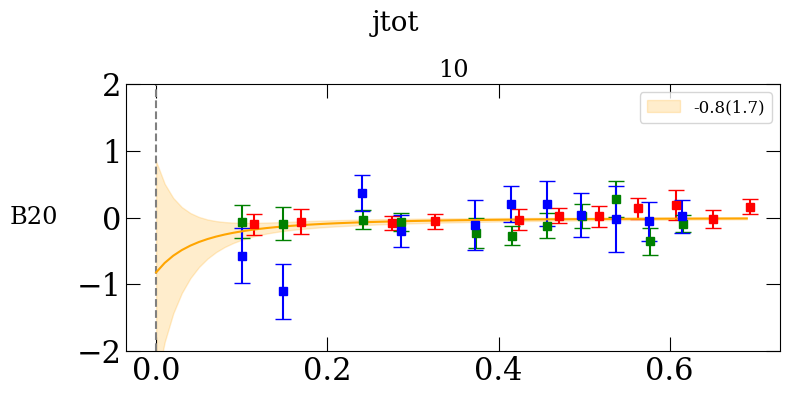

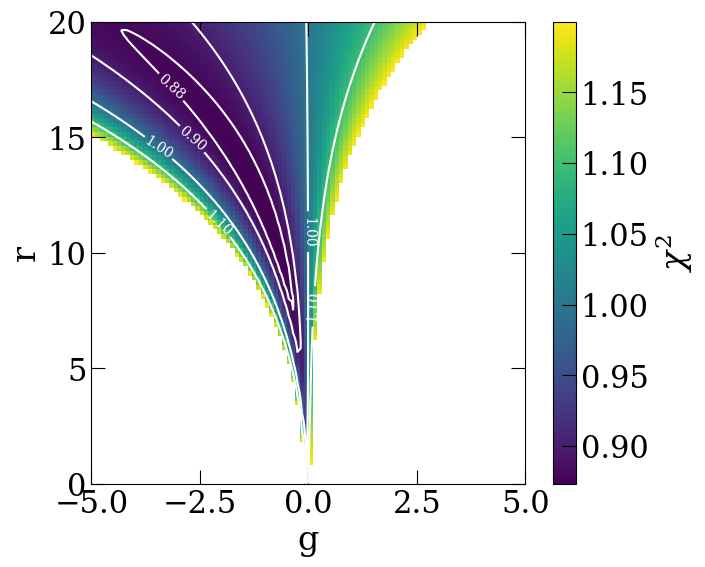

In [72]:
# test

def msq2Q2(msq,ens):
    L=ens2N[ens]
    n1vec=np.array([0,0,0]); nqvec=np.array([0,0,np.sqrt(msq)])
    nvec=n1vec+nqvec
    pvec=nvec*(2*np.pi/L); p1vec=n1vec*(2*np.pi/L)
    qvec=nqvec*(2*np.pi/L)
    
    xE_jk=np.sqrt(pvec.dot(pvec)+ens2mN[ens]**2)
    xE1_jk=np.sqrt(p1vec.dot(p1vec)+ens2mN[ens]**2)
    Q2_jk=(qvec.dot(qvec) - (xE_jk-xE1_jk)**2 )
    Q2=np.mean(Q2_jk)
    
    return Q2*ens2aInv[ens]**2/(1000**2)

Q2cut=0.7

results={}

colors=['r','g','b']
FFs=['B20']
stouts_plt=[10]
def run(j,title):
    fig, axs = yu.getFigAxs(len(FFs),len(stouts_plt),Lrow=4,Lcol=8,sharex=True,sharey='row')
    xunit=1; yunit=1
    yu.addRowHeader(axs,FFs)
    yu.addColHeader(axs,stouts_plt)
    fig.suptitle(title)
    
    for istout,stout in enumerate(stouts_plt):
        for iFF,FF in enumerate(FFs):
            ax=axs[iFF,istout]
            # ax.set_ylim([[-1,3],[-2,2],[-2,2]][iff])
            # ax.set_ylim([[-0.5,1.5],[-0.4,0.4],[-0.4,0.4]][iFF])
            ax.set_ylim([-2,2])
            
            if FF=='A20':
                ax.axhline(1,color='grey',ls='--',marker='')
            ax.axvline(0,color='grey',ls='--',marker='')
            
            ens2ffs={}; ens2Q2s={}
            for iens,ens in enumerate(enss):
                msqs=ens2msqs[ens]
                Q2s=np.array([msq2Q2(msq,ens) for msq in msqs])
                ffs=np.transpose([ens2data[ens][f'{j};stout{stout}_{FF}_{msq}'] for msq in msqs])
                
                ens2Q2s[ens]=np.array([msq2Q2(msq,ens) for msq in msqs if msq2Q2(msq,ens)<Q2cut])
                ens2ffs[ens]=np.transpose([ens2data[ens][f'{j};stout{stout}_{FF}_{msq}'] for msq in msqs if msq2Q2(msq,ens)<Q2cut])
                
                mean,err=yu.jackme(ffs)
                plt_x=Q2s*xunit; plt_y=mean*yunit; plt_yerr=err*yunit
                ax.errorbar(plt_x,plt_y,plt_yerr,color=colors[iens])
                
                if FF=='A20':
                    msqs=[0]
                    Q2s=np.array([msq2Q2(msq,ens) for msq in msqs])
                    ffs=np.transpose([ens2data[ens][f'{j};stout{stout}_{FF}_{msq}'] for msq in msqs])
                    
                    mean,err=yu.jackme(ffs)
                    plt_x=Q2s*xunit+0.004*(iens-1); plt_y=mean*yunit; plt_yerr=err*yunit
                    ax.errorbar(plt_x,plt_y,plt_yerr,color=colors[iens],mfc='white')
                    
                    msqs=ens2msqs[ens]+[0]
                    ens2Q2s[ens]=np.array([msq2Q2(msq,ens) for msq in msqs if msq2Q2(msq,ens)<Q2cut])
                    ens2ffs[ens]=np.transpose([ens2data[ens][f'{j};stout{stout}_{FF}_{msq}'] for msq in msqs if msq2Q2(msq,ens)<Q2cut])
            
            ft2func={
                'const':lambda Q2,a2,g:g,
                'c*a2':lambda Q2,a2,g,c:g+c*a2,
                'd*Q2':lambda Q2,a2,g,d:g+d*Q2,
                'c*a2+d*Q2':lambda Q2,a2,g,c,d:g+c*a2+d*Q2,
                # 'dipole':lambda Q2,a2,g0,r0,g2,r2:(g0+a2*g2)/((1+Q2*(r0**2+a2*r2**2)/12)**2)
                'dipole':lambda Q2,a2,g0,r0:g0/((1+Q2*(r0**2)/12)**2)
            }
            ft2pars0={
                'const':[0],
                'c*a2':[0,0],
                'd*Q2':[0,0],
                'c*a2+d*Q2':[0,0,0],
                'dipole':[0,0.1]
            }
            
            Q2s_plt=np.arange(0,Q2cut,0.01)
            
            # fts=['c*a2+d*Q2']
            # fts=['const','c*a2','d*Q2','c*a2+d*Q2']
            fts=['dipole']
            
            y_jk=yu.superjackknife([ens2ffs[ens] for ens in enss])

            fits=[]
            for ft in fts:
                func=ft2func[ft]; pars0=ft2pars0[ft]
                
                
                def fitfunc(pars):
                    t=np.concatenate([[func(Q2,ens2a[ens]**2,*pars) for Q2 in ens2Q2s[ens]] for ens in enss])
                    return t
                pars_jk,chi2_jk,Ndof=yu.jackfit(fitfunc,y_jk,pars0)
                
                print(np.mean(pars_jk,axis=0))
                
                pars2ffs=lambda pars:[func(Q2,0,*pars) for Q2 in Q2s_plt]
                ffs=yu.jackmap(pars2ffs,pars_jk)
                
                fits.append([ft,ffs,chi2_jk,Ndof])
                
            color='orange'
            ffs,props_jk=yu.jackMA(fits)            
            # print(stout,FF,np.mean(props_jk,axis=0))
            results[f'{j}_{stout}_{FF}']=ffs[:,0]
            mean,err=yu.jackme(ffs)
            x=Q2s_plt; ymin=mean-err; ymax=mean+err
            ax.plot(x,mean,color=color,linestyle='-',marker='')
            ax.fill_between(x, ymin, ymax, color=color, alpha=0.2, label=yu.un2str(mean[0],err[0]))
                
            ax.legend(fontsize=12)                
    
    plt.tight_layout()
    # plt.savefig(f'{baseFigPath}/fig_ignore/continuum/{j}.pdf')
    # plt.close()
    
    
    mean,err,cov=yu.jackmec(y_jk)
    # cov=np.diag(np.diag(cov))
    covI=np.linalg.inv(cov)
    Ndof=len(mean)-2
    def chi2(r0,g0):
        t=np.concatenate([[func(Q2,ens2a[ens]**2,r0,g0) for Q2 in ens2Q2s[ens]] for ens in enss])
        diff=mean-t
        chi2=diff@covI@diff
        return chi2/Ndof
    
    # Define parameter grid
    par0_vals = np.linspace(-5, 5, 100)
    par1_vals = np.linspace(0, 20, 100)


    Z = np.zeros((len(par1_vals), len(par0_vals)))
    for i, p1 in enumerate(par1_vals):
        for j, p0 in enumerate(par0_vals):
            Z[i, j] = chi2(p0, p1)
            
    # chi2_min = Z.min()
    # delta_chi2 = chi2 - chi2_min
    mask = np.ma.masked_where(Z > 1.2, Z)
            
    # Plot heatmap
    plt.figure(figsize=(7,6))
    hm = plt.imshow(mask, origin='lower',
                    extent=[par0_vals.min(), par0_vals.max(), par1_vals.min(), par1_vals.max()],
                    aspect='auto', cmap='viridis')

    # Overlay contours
    levels = [2.3, 6.18, 11.83]  # 1σ, 2σ, 3σ for 2 parameters
    levels = [0.88,0.9, 1, 1.1] 
    P0, P1 = np.meshgrid(par0_vals, par1_vals)
    cs = plt.contour(P0, P1, Z, levels=levels, colors='white', linewidths=1.5)
    plt.clabel(cs, inline=True, fontsize=10, fmt="%.2f")

    # Colorbar
    plt.colorbar(hm, label=r"$\chi^2$")

    # Labels
    plt.xlabel("g")
    plt.ylabel("r")
    # plt.title(r"Chi-square Heatmap with Contours")

    plt.show()
    
    # print(chi2(0,0))
    # print(chi2(-0.821,10.9))

os.makedirs(f'{baseFigPath}/fig_ignore/continuum',exist_ok=True)
# js=['ju','jd','js','jc','jq','jg','jtot']
js=['jtot']
for j in js:
    print(j,end='              \r')
    jconn=f'{j};conn'
    # run(jconn,jconn)
    run(j,j)

In [11]:
def msq2Q2(msq,ens):
    L=ens2N[ens]
    n1vec=np.array([0,0,0]); nqvec=np.array([0,0,np.sqrt(msq)])
    nvec=n1vec+nqvec
    pvec=nvec*(2*np.pi/L); p1vec=n1vec*(2*np.pi/L)
    qvec=nqvec*(2*np.pi/L)
    
    xE_jk=np.sqrt(pvec.dot(pvec)+ens2mN[ens]**2)
    xE1_jk=np.sqrt(p1vec.dot(p1vec)+ens2mN[ens]**2)
    Q2_jk=(qvec.dot(qvec) - (xE_jk-xE1_jk)**2 )
    Q2=np.mean(Q2_jk)
    
    return Q2*ens2aInv[ens]**2/(1000**2)

results={}

colors=['r','g','b']
FFs=['A20','B20','C20']
def run(j,title):
    stouts_plt=[10,19]
    stouts_plt=[7,10,13,19]
    fig, axs = yu.getFigAxs(len(enss),len(stouts_plt),Lrow=4,Lcol=8,sharex=True,sharey='row')
    xunit=1; yunit=1
    yu.addRowHeader(axs,FFs)
    yu.addColHeader(axs,stouts_plt)
    fig.suptitle(title)
    
    for istout,stout in enumerate(stouts_plt):
        for iFF,FF in enumerate(FFs):
            
            Q2cut=0.7 if FF in ['A20'] else 0.7
            
            ax=axs[iFF,istout]
            # ax.set_ylim([[-1,3],[-2,2],[-2,2]][iff])
            ax.set_ylim([[-0.5,1.5],[-0.4,0.4],[-0.4,0.4]][iFF])
            
            if FF=='A20':
                ax.axhline(1,color='grey',ls='--',marker='')
            else:
                ax.axhline(0,color='grey',ls='--',marker='')
            ax.axvline(0,color='grey',ls='--',marker='')
            
            ens2ffs={}; ens2Q2s={}
            for iens,ens in enumerate(enss):
                msqs=ens2msqs[ens]
                Q2s=np.array([msq2Q2(msq,ens) for msq in msqs])
                ffs=np.transpose([ens2data[ens][f'{j};stout{stout}_{FF}_{msq}'] for msq in msqs])
                
                ens2Q2s[ens]=np.array([msq2Q2(msq,ens) for msq in msqs if msq2Q2(msq,ens)<Q2cut])
                ens2ffs[ens]=np.transpose([ens2data[ens][f'{j};stout{stout}_{FF}_{msq}'] for msq in msqs if msq2Q2(msq,ens)<Q2cut])
                
                mean,err=yu.jackme(ffs)
                plt_x=Q2s*xunit; plt_y=mean*yunit; plt_yerr=err*yunit
                ax.errorbar(plt_x,plt_y,plt_yerr,color=colors[iens])
                
                if FF=='A20':
                    msqs=[0]
                    Q2s=np.array([msq2Q2(msq,ens) for msq in msqs])
                    ffs=np.transpose([ens2data[ens][f'{j};stout{stout}_{FF}_{msq}'] for msq in msqs])
                    
                    mean,err=yu.jackme(ffs)
                    plt_x=Q2s*xunit+0.004*(iens-1); plt_y=mean*yunit; plt_yerr=err*yunit
                    ax.errorbar(plt_x,plt_y,plt_yerr,color=colors[iens],mfc='white')
                    
                    msqs=ens2msqs[ens]+[0]
                    ens2Q2s[ens]=np.array([msq2Q2(msq,ens) for msq in msqs if msq2Q2(msq,ens)<Q2cut])
                    ens2ffs[ens]=np.transpose([ens2data[ens][f'{j};stout{stout}_{FF}_{msq}'] for msq in msqs if msq2Q2(msq,ens)<Q2cut])
            
            ft2func={
                'const':lambda Q2,a2,g:g,
                'c*a2':lambda Q2,a2,g,c:g+c*a2,
                'd*Q2':lambda Q2,a2,g,d:g+d*Q2,
                'c*a2+d*Q2':lambda Q2,a2,g,c,d:g+c*a2+d*Q2,
                'dipole':lambda Q2,a2,g0,r0:(g0)/((1+Q2*(r0**2)/12)**2),
                'dipole+a2':lambda Q2,a2,g0,r0,g2,r2:(g0+a2*g2)/((1+Q2*(r0**2+a2*r2**2)/12)**2)
                # 'dipole':lambda Q2,a2,g0,r0,g2:(g0+a2*g2)/((1+Q2*(r0**2)/12)**2)
            }
            ft2pars0={
                'const':[0],
                'c*a2':[0,0],
                'd*Q2':[0,0],
                'c*a2+d*Q2':[0,0,0],
                'dipole':[0,0.1],
                'dipole+a2':[0,0.1,0,0.1]
            }
            
            Q2s_plt=np.arange(0,Q2cut,0.01)
            
            # fts=['c*a2+d*Q2']
            # fts=['const','c*a2','d*Q2','c*a2+d*Q2']
            # fts=['dipole']
            
            # fts=['c*a2+d*Q2'] if FF in ['A20'] else ['c*a2']
            # fts=['d*Q2','c*a2+d*Q2'] if FF in ['A20'] else ['const','c*a2']
            # fts=['const','c*a2','d*Q2','c*a2+d*Q2'] if FF in ['A20'] else ['const','c*a2']
            
            # fts=['d*Q2','c*a2+d*Q2'] if FF in ['A20'] else ['const','c*a2']
            
            fts=['dipole','dipole+a2'] if FF in ['A20'] else ['const','c*a2']

            fits=[]
            for ft in fts:
                func=ft2func[ft]; pars0=ft2pars0[ft]
                y_jk=yu.superjackknife([ens2ffs[ens] for ens in enss])
                
                def fitfunc(pars):
                    t=np.concatenate([[func(Q2,ens2a[ens]**2,*pars) for Q2 in ens2Q2s[ens]] for ens in enss])
                    return t
                pars_jk,chi2_jk,Ndof=yu.jackfit(fitfunc,y_jk,pars0)
                
                # print(np.mean(pars_jk,axis=0))
                
                pars2ffs=lambda pars:[func(Q2,0,*pars) for Q2 in Q2s_plt]
                ffs=yu.jackmap(pars2ffs,pars_jk)
                
                fits.append([ft,ffs,chi2_jk,Ndof])
                
            color='orange'
            ffs,props_jk=yu.jackMA(fits)            
            # print(stout,FF,np.mean(props_jk,axis=0))
            results[f'{j}_{stout}_{FF}']=ffs[:,0]
            mean,err=yu.jackme(ffs)
            x=Q2s_plt; ymin=mean-err; ymax=mean+err
            ax.plot(x,mean,color=color,linestyle='-',marker='')
            ax.fill_between(x, ymin, ymax, color=color, alpha=0.2, label=yu.un2str(mean[0],err[0]))
                
            ax.legend(fontsize=12)
    
    plt.tight_layout()
    plt.savefig(f'{baseFigPath}/fig_ignore/continuum/{j}.pdf')
    plt.close()

os.makedirs(f'{baseFigPath}/fig_ignore/continuum',exist_ok=True)
js=['ju','jd','js','jc','jq','jg','jtot']
js=['jtot']
for j in js:
    print(j,end='              \r')
    jconn=f'{j};conn'
    # run(jconn,jconn)
    run(j,j)

In [7]:
stouts_plt=[7,10,13,19]
obss=['<x>','J','B20']

obs2label={
    '<x>':r"$\langle x\rangle _p^{q^+,g}$",
    'J':r"$J_p^{q^+,g}$",
    'B20':r"B20",
}

fig, axs = yu.getFigAxs(len(obss),len(stouts_plt),Lrow=6,Lcol=8,sharey='row')
# yu.addRowHeader(axs,[obs2label[obs] for obs in obss])
yu.addColHeader(axs,stouts_plt)


js = ['ju','jd','js','jc','jq','jg','jtot']
labels = [r'$u^+$', r'$d^+$', r'$s^+$', r'$c^+$', r'$\sum_{q^+ = u,d,s,c}$', r'$g$', 'Total']
colors = ['r','g','b','orange','purple','cyan','grey']

for iobs,obs in enumerate(obss): 
    ax=axs[iobs,0]
    ax.set_ylabel(obs2label[obs], fontsize=14)
    for istout,stout in enumerate(stouts_plt):
        ax=axs[iobs,istout]

        if obs=='<x>':
            ax.axhline(1,color='grey',ls='--',marker='')
            ax.set_ylim([0,1.2])
        if obs=='J':
            ax.axhline(0.5,color='grey',ls='--',marker='')
            ax.axhline(0,color='grey',ls='--',marker='')
            ax.set_ylim([-0.1,0.6])
        if obs=='B20':
            ax.axhline(0,color='grey',ls='--',marker='')
            ax.set_ylim([-0.6,0.6])

        x = np.arange(len(labels))
        ax.set_xticks(x)
        ax.set_xticklabels(labels, fontsize=12)
        ax.set_xlim([x[0]-3/4,x[-1]+3/4])
        
        if obs=='<x>':
            mes_conn=[yu.jackme(results[f'{j};conn_{stout}_A20']) for j in js]
            mes=[yu.jackme(results[f'{j}_{stout}_A20']) for j in js]
            factor=1
        if obs=='J':
            mes_conn=[yu.jackme((results[f'{j};conn_{stout}_A20']+results[f'{j};conn_{stout}_B20'])/2) for j in js]
            mes=[yu.jackme((results[f'{j}_{stout}_A20']+results[f'{j}_{stout}_B20'])/2) for j in js]
            factor=0.5
        if obs=='B20':
            mes_conn=[yu.jackme(results[f'{j};conn_{stout}_B20']) for j in js]
            mes=[yu.jackme(results[f'{j}_{stout}_B20']) for j in js]
            
        ax.bar(x, [ele[0] for ele in mes_conn], capsize=5, color=colors, alpha=0.8, width=0.3, edgecolor='grey')
        bars=ax.bar(x, [ele[0] for ele in mes], yerr=[ele[1] for ele in mes], capsize=5, color=colors, alpha=0.2, width=0.5, edgecolor='grey')

        func=lambda res:'{:.1f}({:.1f})%'.format(res[0]*100/factor,res[1]*100/factor)
        percentages=[func(ele) for ele in mes]

        for i, (bar, pct) in enumerate(zip(bars, percentages)):
            height = bar.get_height()
            height = 0 if height < 0.2 else height - 0.2
            ax.text(bar.get_x() - 0.1, height, pct,
                    ha='center', va='bottom', fontsize=10, rotation=90)
            
plt.tight_layout()
plt.savefig(f'{baseFigPath}/decomposition.pdf')
plt.close()